## Загрузка данных и изучение общей информации.<a id="load"></a>

### Импортирую необходимые библиотеки:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import re
# вывожу столбцы всей шириной
pd.set_option('display.max_colwidth', False)
# вывожу строки большей высотой
pd.set_option('display.max_rows', 500)

#### Сохраняю данные в переменной "kafe".

In [2]:
try:
    kafe = pd.read_csv('C:/datasets/moscow_places.csv')
except:
    kafe = pd.read_csv('https://code.s3.yandex.net/datasets/moscow_places.csv')

### Общая информация о датасете:

In [3]:
kafe.head()

name  category                              address  \
0  WoWфли                кафе      Москва, улица Дыбенко, 7/1            
1  Четыре комнаты        ресторан  Москва, улица Дыбенко, 36, корп. 1    
2  Хазри                 кафе      Москва, Клязьминская улица, 15        
3  Dormouse Coffee Shop  кофейня   Москва, улица Маршала Федоренко, 12   
4  Иль Марко             пиццерия  Москва, Правобережная улица, 1Б       

                          district  \
0  Северный административный округ   
1  Северный административный округ   
2  Северный административный округ   
3  Северный административный округ   
4  Северный административный округ   

                                                  hours        lat        lng  \
0  ежедневно, 10:00–22:00                                55.878494  37.478860   
1  ежедневно, 10:00–22:00                                55.875801  37.484479   
2  пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00–02:00  55.889146  37.525901   
3  ежедневно, 09:00–22:00                                55.881608  37.488860   
4  ежедневно, 10:00–22:00                                55.881166  37.449357   

   rating          price                       avg_bill  middle_avg_bill  \
0  5.0     NaN            NaN                           NaN                
1  4.5     выше среднего  Средний счёт:1500–1600 ₽       1550.0            
2  4.6     средние        Средний счёт:от 1000 ₽         1000.0            
3  5.0     NaN            Цена чашки капучино:155–185 ₽ NaN                
4  5.0     средние        Средний счёт:400–600 ₽         500.0             

   middle_coffee_cup  chain  seats  
0 NaN                 0     NaN     
1 NaN                 0      4.0    
2 NaN                 0      45.0   
3  170.0              0     NaN     
4 NaN                 1      148.0

In [4]:
kafe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8406 entries, 0 to 8405
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               8406 non-null   object 
 1   category           8406 non-null   object 
 2   address            8406 non-null   object 
 3   district           8406 non-null   object 
 4   hours              7870 non-null   object 
 5   lat                8406 non-null   float64
 6   lng                8406 non-null   float64
 7   rating             8406 non-null   float64
 8   price              3315 non-null   object 
 9   avg_bill           3816 non-null   object 
 10  middle_avg_bill    3149 non-null   float64
 11  middle_coffee_cup  535 non-null    float64
 12  chain              8406 non-null   int64  
 13  seats              4795 non-null   float64
dtypes: float64(6), int64(1), object(7)
memory usage: 919.5+ KB


In [5]:
print(kafe['category'].unique())

['кафе' 'ресторан' 'кофейня' 'пиццерия' 'бар,паб' 'быстрое питание'
 'булочная' 'столовая']


**Вывод:** Данные для исследования содержат информацию по 8 категориям заведений общественного питания: 'кафе', 'ресторан', 'кофейня', 'пиццерия', 'бар,паб', 'быстрое питание',
 'булочная', 'столовая'.

In [6]:
print(kafe['district'].unique())

['Северный административный округ'
 'Северо-Восточный административный округ'
 'Северо-Западный административный округ'
 'Западный административный округ' 'Центральный административный округ'
 'Восточный административный округ' 'Юго-Восточный административный округ'
 'Южный административный округ' 'Юго-Западный административный округ']


**Вывод:** Данные для исследования содержат информацию по 9 округам города Москвы: 'Северный административный округ',
 'Северо-Восточный административный округ',
 'Северо-Западный административный округ',
 'Западный административный округ', 'Центральный административный округ',
 'Восточный административный округ', 'Юго-Восточный административный округ',
 'Южный административный округ', 'Юго-Западный административный округ' и не включают территорию "Новой Москвы".

### Изучите общую информацию о датасете. Сколько заведений представлено? Что можно сказать о каждом столбце? Значения какого типа они хранят? 

В таблице содержится 14 столбцов, 8406 строк.

#### Сколько заведений представлено?

In [7]:
f'В датасете представлено {kafe["name"].count()} \
записей о заведениях общественного питания города Москвы.'

'В датасете представлено 8406 записей о заведениях общественного питания города Москвы.'

#### Значения какого типа хранятся в столбцах?

* **name:** В этом столбце тип данных 'object' и совпадает с ожидаемым.
* **category:** В этом столбце тип данных 'object' и совпадает с ожидаемым.
* **address:** В этом столбце тип данных 'object' и совпадает с ожидаемым.
* **district:** В этом столбце тип данных 'object' и совпадает с ожидаемым.
* **hours:** В этом столбце тип данных 'object' и совпадает с ожидаемым.
* **lat:** В этом столбце тип данных 'float64' и совпадает с ожидаемым.
* **lng:** В этом столбце тип данных 'float64' и совпадает с ожидаемым.
* **rating:** В этом столбце тип данных 'float64' и совпадает с ожидаемым.
* **price:** В этом столбце тип данных 'object' и совпадает с ожидаемым.
* **avg_bill:** В этом столбце тип данных 'object' и совпадает с ожидаемым.
* **middle_avg_bill:** В этом столбце тип данных 'float64' и совпадает с ожидаемым.
* **middle_coffee_cup:** В этом столбце тип данных 'float64' и совпадает с ожидаемым.
* **chain:** В этом столбце тип данных 'int64' и совпадает с ожидаемым.
* **seats:** В этом столбце тип данных 'float64' не совпадает с ожидаемым, ведь количество сидений не может быть дробным числом. Здесь потребуется преобразовать тип данных в целочисленный 'int64'.


In [8]:
kafe.describe()

lat          lng       rating  middle_avg_bill  \
count  8406.000000  8406.000000  8406.000000  3149.000000       
mean   55.750109    37.608570    4.229895     958.053668        
std    0.069658     0.098597     0.470348     1009.732845       
min    55.573942    37.355651    1.000000     0.000000          
25%    55.705155    37.538583    4.100000     375.000000        
50%    55.753425    37.605246    4.300000     750.000000        
75%    55.795041    37.664792    4.400000     1250.000000       
max    55.928943    37.874466    5.000000     35000.000000      

       middle_coffee_cup        chain        seats  
count  535.000000         8406.000000  4795.000000  
mean   174.721495         0.381275     108.421689   
std    88.951103          0.485729     122.833396   
min    60.000000          0.000000     0.000000     
25%    124.500000         0.000000     40.000000    
50%    169.000000         0.000000     75.000000    
75%    225.000000         1.000000     140.000000   
max    1568.000000        1.000000     1288.000000

### Вывод после предварительного изучения данных:

После предварительного изучения данных удалось выяснить что:

* В таблице содержатся записи о 8406 заведениях общественного питания города Москвы;

* Данные для исследования содержат информацию по 8 категориям заведений общественного питания: 'кафе', 'ресторан', 'кофейня', 'пиццерия', 'бар,паб', 'быстрое питание', 'булочная', 'столовая';

* Данные для исследования содержат информацию по 9 округам города Москвы: 'Северный административный округ', 'Северо-Восточный административный округ', 'Северо-Западный административный округ', 'Западный административный округ', 'Центральный административный округ', 'Восточный административный округ', 'Юго-Восточный административный округ', 'Южный административный округ', 'Юго-Западный административный округ' и не включают территорию "Новой Москвы".

* По многим заведениям отсутствуют данные о часах работы(hours), о категории цен(price), о категории среднего чека(avg_bill), о числовом значении среднего чека(middle_avg_bill), о числовом значении цены чашки капучино(middle_coffee_cup) и о количестве посадочных мест в заведении(seats);

* В диапазоне данных видны аномальные значения, например, цена чашки кофе в 1568 руб. и количество посадочных мест в равное 1288;

* В столбце seats тип данных 'float64' не совпадает с ожидаемым, ведь количество посадочных мест не может быть дробным числом. Здесь потребуется преобразовать тип данных в целочисленный.

## Предобработка данных.<a id="preprocessing"></a>

### Есть ли дубликаты в данных?

Проверяю наличие полных дубликатов:

In [9]:
kafe.duplicated().sum()

0

Полные дубликаты не обнаружены. Проведу более детальную проверку. Для начала удаляю возможные лишние пробелы в названиях заведений, затем приведу названия заведений и их адреса в нижний регистр:

In [10]:
while '  ' in kafe.name:
    data.name = data.name.replace('  ', ' ')
kafe.duplicated().sum()    
kafe.name = kafe['name'].str.lower()
kafe.address = kafe['address'].str.lower()

In [11]:
kafe.duplicated().sum()

0

Заменяю букву ё на е.

In [12]:
kafe['name'] = kafe['name'].str.replace('ё', 'е', regex=True)

In [13]:
kafe.name.duplicated().sum()

2900

В названиях обнаружилось 2900 полных дубликатов. Правда, тут могут быть сетевые названия, необходимо проверить и по адресу:

In [14]:
kafe.duplicated(subset=['name', 'address']).sum()

4

Рассмотрю строки дубликаты:

In [15]:
kafe.loc[kafe.duplicated(subset=['name', 'address'], keep=False)]

name  category  \
189   кафе                       кафе       
215   кафе                       кафе       
1430  more poke                  ресторан   
1511  more poke                  ресторан   
2211  раковарня клешни и хвосты  ресторан   
2420  раковарня клешни и хвосты  бар,паб    
3091  хлеб да выпечка            булочная   
3109  хлеб да выпечка            кафе       

                                      address  \
189   москва, парк ангарские пруды              
215   москва, парк ангарские пруды              
1430  москва, волоколамское шоссе, 11, стр. 2   
1511  москва, волоколамское шоссе, 11, стр. 2   
2211  москва, проспект мира, 118                
2420  москва, проспект мира, 118                
3091  москва, ярцевская улица, 19               
3109  москва, ярцевская улица, 19               

                                     district  \
189   Северный административный округ           
215   Северный административный округ           
1430  Северный административный округ           
1511  Северный административный округ           
2211  Северо-Восточный административный округ   
2420  Северо-Восточный административный округ   
3091  Западный административный округ           
3109  Западный административный округ           

                                                     hours        lat  \
189   ежедневно, 09:00–23:00                                55.880327   
215   ежедневно, 10:00–22:00                                55.881438   
1430  ежедневно, 09:00–21:00                                55.806307   
1511  пн-чт 09:00–18:00; пт,сб 09:00–21:00; вс 09:00–18:00  55.806307   
2211  ежедневно, 12:00–00:00                                55.810553   
2420  пн-чт 12:00–00:00; пт,сб 12:00–01:00; вс 12:00–00:00  55.810677   
3091  ежедневно, 09:00–22:00                                55.738886   
3109  NaN                                                   55.738449   

            lng  rating price avg_bill  middle_avg_bill  middle_coffee_cup  \
189   37.530786  3.2     NaN   NaN     NaN              NaN                  
215   37.531848  3.2     NaN   NaN     NaN              NaN                  
1430  37.497566  4.2     NaN   NaN     NaN              NaN                  
1511  37.497566  4.2     NaN   NaN     NaN              NaN                  
2211  37.638161  4.4     NaN   NaN     NaN              NaN                  
2420  37.638379  4.4     NaN   NaN     NaN              NaN                  
3091  37.411648  4.1     NaN   NaN     NaN              NaN                  
3109  37.410937  4.1     NaN   NaN     NaN              NaN                  

      chain  seats  
189   0     NaN     
215   0     NaN     
1430  0      188.0  
1511  1      188.0  
2211  0      150.0  
2420  1      150.0  
3091  1      276.0  
3109  0      276.0

Удаляя строки дубликаты, оставляю те строки где информация выглядит логичнее.

In [16]:
kafe = kafe.drop(index=[215, 1511, 2211, 3109])

In [17]:
kafe = kafe.reset_index(drop=True)
len(kafe)

8402

**Вывод:** Проверка по названию и адресу заведений позволила обнаружить 4 строки дубликаты, они были удалены.

### Встречаются ли пропуски, в каких столбцах? Можно ли их обработать или оставить как есть?

In [18]:
kafe.isna().sum().sort_values(ascending=False)

middle_coffee_cup    7867
middle_avg_bill      5253
price                5087
avg_bill             4586
seats                3610
hours                535 
name                 0   
category             0   
address              0   
district             0   
lat                  0   
lng                  0   
rating               0   
chain                0   
dtype: int64

In [19]:
(kafe.isna().mean()*100).sort_values(ascending=False)

middle_coffee_cup    93.632468
middle_avg_bill      62.520828
price                60.545108
avg_bill             54.582242
seats                42.965960
hours                6.367532 
name                 0.000000 
category             0.000000 
address              0.000000 
district             0.000000 
lat                  0.000000 
lng                  0.000000 
rating               0.000000 
chain                0.000000 
dtype: float64

В некоторых столбцах имеются пропуски данных:

* **middle_coffee_cup:** В этом столбце пропущено 93.63% данных.
* **middle_avg_bill:** В этом столбце пропущено 62.52% данных.
* **price:** В этом столбце пропущено 60.54% данных.
* **avg_bill:** В этом столбце пропущено 54.58% данных.
* **seats:** В этом столбце пропущено 42.96% данных.
* **hours:** В этом столбце пропущено 6.36% данных.

В остальных столбцах таблицы: **name, category, address, district, lat, lng, rating, price, chain**, нет пропусков.

**Вывод:** В столбце 'price' имеются 5087 пропущенных данных, в столбце avg_bill имеются 4586 пропусков, в столбце middle_avg_bill - 5253, в столбце middle_coffee_cup - 7867 и в столбце seats - 3610. После изучения свойств пропущенных данных и их влияние на результаты моего исследование решил не удалить пропуски, так как их удаление может привести к искажению результатов.

### Создайте столбец street с названиями улиц из столбца с адресом.

Для создания столбца street буду применять регулярные выражения:

In [20]:
words=['улица', 'ул', 'переулок', 'шоссе', 'проспект', 'площадь', \
       'проезд', 'село', 'аллея', 'бульвар', 'набережная', 'тупик', \
       'линия', 'просек', 'пр-т', 'парк', '-й', '-я']
str_pat = r".*,\s*\b([^,]*?(?:{})\b[^,]*)[,$]+".format("|".join(words))
kafe['street'] = kafe['address'].str.extract(str_pat, flags=re.I)

In [21]:
kafe.query('street.isna()').address.count()

144

После прохождения по таблице регулярным выражением осталось 144 адресов с неопределёнными улицами.

In [22]:
print(kafe.query('street.isna()').address.unique())

['москва, парк левобережный' 'москва, ландшафтный заказник лианозовский'
 'москва, лианозовский парк культуры и отдыха' 'москва, парк алтуфьево'
 'москва, парк ангарские пруды' 'москва, проектируемый проезд № 5265'
 'москва, парк этнографическая деревня бибирево'
 'москва, северный административный округ, головинский район'
 'москва, парк культуры и отдыха северное тушино'
 'москва, северо-западный административный округ, район северное тушино'
 'москва, парк дружбы' 'москва, ленинградское шоссе'
 'москва, северный административный округ, район левобережный, территория парка дружбы'
 'москва, коптевский бульвар д 18 а стр 1' 'москва, грузинский сквер'
 'москва, северо-восточный административный округ, район отрадное'
 'москва, северо-восточный административный округ, останкинский район, выставка достижений народного хозяйства, кольцевая дорога'
 'москва, парк останкино'
 'москва, главный ботанический сад имени н.в. цицина российской академии наук'
 'москва, северо-восточный администрат

**Вывод:** Пустыми остались адреса в которых не содержится слово "улица", что вполне соответствует условиям задания. Буду заполнять пустые значения заглушкой 'неизвестно'.

In [23]:
kafe.street = kafe.street.fillna('неизвестно')
kafe['street'].isna().sum()

0

**Вывод:** В таблицу добавлен столбец 'street', с извлечённым из адресов названием улиц. 144 строки столбца 'street' с пустыми названиями улиц были заполнены заглушкой 'неизвестно'.

### Создайте столбец is_24_7 со значением, что заведение работает ежедневно и круглосуточно (24/7):

Создаю столбец "is_24_7" с обозначением, что заведение работает ежедневно и круглосуточно (24/7):
* логическое значение True — если заведение работает ежедневно и круглосуточно;
* логическое значение False — в противоположном случае.

In [24]:
kafe.hours = kafe.hours.fillna('неизвестно')

In [25]:
kafe[kafe['hours'].str.contains(r'\bкруглосуточно')]

name  category  \
10    great room bar       бар,паб    
17    чайхана беш-бармак   ресторан   
19    пекарня              булочная   
24    drive café           кафе       
49    2u-ту-ю              пиццерия   
...       ...                   ...   
8390  намангале            кафе       
8395  пекарня, кафе-гриль  булочная   
8399  самовар              кафе       
8400  чайхана sabr         кафе       
8401  kebab time           кафе       

                                        address  \
10    москва, левобережная улица, 12              
17    москва, ленинградское шоссе, 71б, стр. 2    
19    москва, ижорский проезд, 5                  
24    москва, улица дыбенко, 9ас1                 
49    москва, ижорская улица, 8а                  
...                          ...                  
8390  москва, ферганская улица, вл17-21           
8395  москва, болотниковская улица, 52, корп. 2   
8399  москва, люблинская улица, 112а, стр. 1      
8400  москва, люблинская улица, 112а, стр. 1      
8401  москва, россошанский проезд, 6              

                                  district                     hours  \
10    Северный административный округ       ежедневно, круглосуточно   
17    Северный административный округ       ежедневно, круглосуточно   
19    Северный административный округ       ежедневно, круглосуточно   
24    Северный административный округ       ежедневно, круглосуточно   
49    Северный административный округ       ежедневно, круглосуточно   
...                               ...                            ...   
8390  Юго-Восточный административный округ  ежедневно, круглосуточно   
8395  Юго-Западный административный округ   ежедневно, круглосуточно   
8399  Юго-Восточный административный округ  ежедневно, круглосуточно   
8400  Юго-Восточный административный округ  ежедневно, круглосуточно   
8401  Южный административный округ          ежедневно, круглосуточно   

            lat        lng  rating    price                    avg_bill  \
10    55.877832  37.469171  4.5     средние  Цена бокала пива:250–350 ₽   
17    55.876908  37.449876  4.4     средние  Средний счёт:350–500 ₽       
19    55.887969  37.515688  4.4     NaN      NaN                          
24    55.879992  37.481571  4.0     NaN      NaN                          
49    55.886160  37.508784  2.7     NaN      Средний счёт:900 ₽           
...         ...        ...  ...     ...                     ...           
8390  55.705332  37.819244  4.3     NaN      NaN                          
8395  55.662866  37.582572  4.2     NaN      Средний счёт:50–250 ₽        
8399  55.648859  37.743219  3.9     NaN      Средний счёт:от 150 ₽        
8400  55.648849  37.743222  4.2     NaN      NaN                          
8401  55.598229  37.604702  3.9     NaN      NaN                          

      middle_avg_bill  middle_coffee_cup  chain  seats                street  
10   NaN              NaN                 0      102.0  левобережная улица    
17    425.0           NaN                 0      96.0   ленинградское шоссе   
19   NaN              NaN                 1     NaN     ижорский проезд       
24   NaN              NaN                 1     NaN     улица дыбенко         
49    900.0           NaN                 0     NaN     ижорская улица        
...     ...            ..                ..      ..                ...        
8390 NaN              NaN                 0     NaN     ферганская улица      
8395  150.0           NaN                 0      50.0   болотниковская улица  
8399  150.0           NaN                 0      150.0  люблинская улица      
8400 NaN              NaN                 1      150.0  люблинская улица      
8401 NaN              NaN                 0      12.0   россошанский проезд   

[772 rows x 15 columns]

In [26]:
kafe['hours'].value_counts().head()

hours
ежедневно, 10:00–22:00      758
ежедневно, круглосуточно    730
неизвестно                  535
ежедневно, 11:00–23:00      396
ежедневно, 10:00–23:00      310
Name: count, dtype: int64

In [27]:
for i in range(len(kafe['hours'])):
    
    if kafe['hours'][i] == 'ежедневно, круглосуточно':
        kafe.loc[i, 'is_24_7'] = True
    else:
        kafe.loc[i, 'is_24_7'] = False
        
kafe['is_24_7'].value_counts()

is_24_7
False    7672
True     730 
Name: count, dtype: int64

In [28]:
len(kafe)

8402

**Вывод:** В таблицу добавлен столбец 'is_24_7', со значением, что заведение работает ежедневно и круглосуточно.

### Вывод по предобработке данных:

* Проверка по названию и адресу заведений позволила обнаружить 4 строки дубликаты, они были удалены. После предобработке данных в таблице содержатся записи о 8402 заведениях общественного питания города Москвы.
* В столбце 'price' имеются 5087 пропущенных данных, в столбце avg_bill имеются 4586 пропусков, в столбце middle_avg_bill - 5253, в столбце middle_coffee_cup - 7867 и в столбце seats - 3610. После изучения свойств пропущенных данных и их возможное влияние на результаты моего исследования, я решил не удалить пропуски, так как их удаление может принести к искажению результатов.
* В таблицу добавлен столбец 'street', с извлечённым из адресов названием улиц. 144 строки столбца 'street' с пустыми названиями улиц были заполнены заглушкой 'неизвестно'.
* В таблицу добавлен столбец 'is_24_7', со значением, что заведение работает ежедневно и круглосуточно.

## Анализ данных<a id="analys"></a>

### Какие категории заведений представлены в данных?

In [29]:
print(kafe['category'].unique())

['кафе' 'ресторан' 'кофейня' 'пиццерия' 'бар,паб' 'быстрое питание'
 'булочная' 'столовая']


**Вывод:** В данных для исследования представлены 8 категорий заведений общественного питания: кафе, ресторан, кофейня, пиццерия, бар,паб, быстрое питание, булочная и столовая.

### Изучите распределение объектов общественного питания по категориям: рестораны, кофейни, пиццерии, бары и другие. Постройте визуализации.

In [30]:
kafe_category = kafe.pivot_table(index='category', values='name', aggfunc='count')\
                .sort_values(by='name', ascending=False)
kafe_category

name
category             
кафе             2376
ресторан         2041
кофейня          1413
бар,паб          765 
пиццерия         633 
быстрое питание  603 
столовая         315 
булочная         256

In [31]:
fig = px.bar(kafe_category.reset_index(),
            x = 'category',
            y = 'name',
            title = 'Количество заведений общественного питания Москвы по категориям.',
            template = 'ggplot2',
            color='category'
            )

fig.update_layout(xaxis_title = 'Категории',
                 yaxis_title = 'Количество заведений')
fig.update_traces(hovertemplate ='Название категории: %{x} <br>Количество: %{y}')

fig.show()

**Вывод:** Среди категорий заведений наибольшее количество заведений у категорий:

 * кафе - 2376 заведений;
 * ресторан - 2041 заведений;
 * кофейня - 1413 заведений.

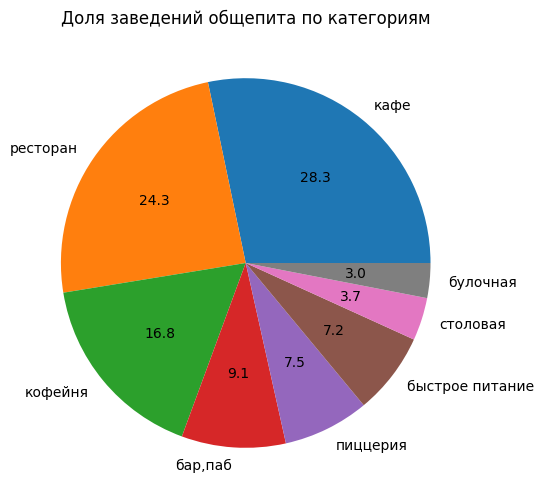

In [32]:
kafe['category'].value_counts().plot(kind='pie', autopct='%.1f', figsize=(6, 6))
plt.title('Доля заведений общепита по категориям')
plt.ylabel('')
plt.show()

**Вывод:** Заведения общественного питания города Москвы распределены по 8 категориям: среди них больше всего кафе - 28.3%, ресторанов - 24.3% и кофейн - 16.8%. Меньше всего столовых- 3.7% и булочных - 3.0%.

### Исследуйте количество посадочных мест в заведениях по категориям. Постройте визуализации. Проанализируйте результаты и сделайте выводы.

#### Изучу распределение количества посадочных мест по категориям заведений.

In [33]:
# посадочные места по категориям заведений
kafe_seats = kafe.query('seats.notnull()')
kafe_seats.groupby('category').agg({'seats': 'describe'})

seats                                                  \
                  count        mean         std  min   25%   50%    75%   
category                                                                  
бар,паб          468.0   124.532051  145.011574  0.0  48.0  82.5  150.0   
булочная         148.0   89.385135   97.685844   0.0  25.0  50.0  120.0   
быстрое питание  349.0   98.891117   106.611739  0.0  28.0  65.0  140.0   
кафе             1217.0  97.365653   117.922464  0.0  35.0  60.0  120.0   
кофейня          751.0   111.199734  127.837772  0.0  40.0  80.0  144.0   
пиццерия         427.0   94.496487   112.282703  0.0  30.0  55.0  120.0   
ресторан         1268.0  121.869874  123.838539  0.0  48.0  86.0  150.0   
столовая         164.0   99.750000   122.951453  0.0  40.0  75.5  117.0   

                         
                    max  
category                 
бар,паб          1288.0  
булочная         625.0   
быстрое питание  1040.0  
кафе             1288.0  
кофейня          1288.0  
пиццерия         1288.0  
ресторан         1288.0  
столовая         1200.0

Для предотвращения искажения результатов исследования, ограничу количество посадочных мест значением равным **seats=600**.

In [34]:
kafe_sit = kafe_seats.query('seats < 600')

Для сортировки по медианне использую параметр "order": создам список order.

In [35]:
order = (kafe_sit.groupby("category").agg({'seats': 'median'})).sort_values("seats").index.tolist()

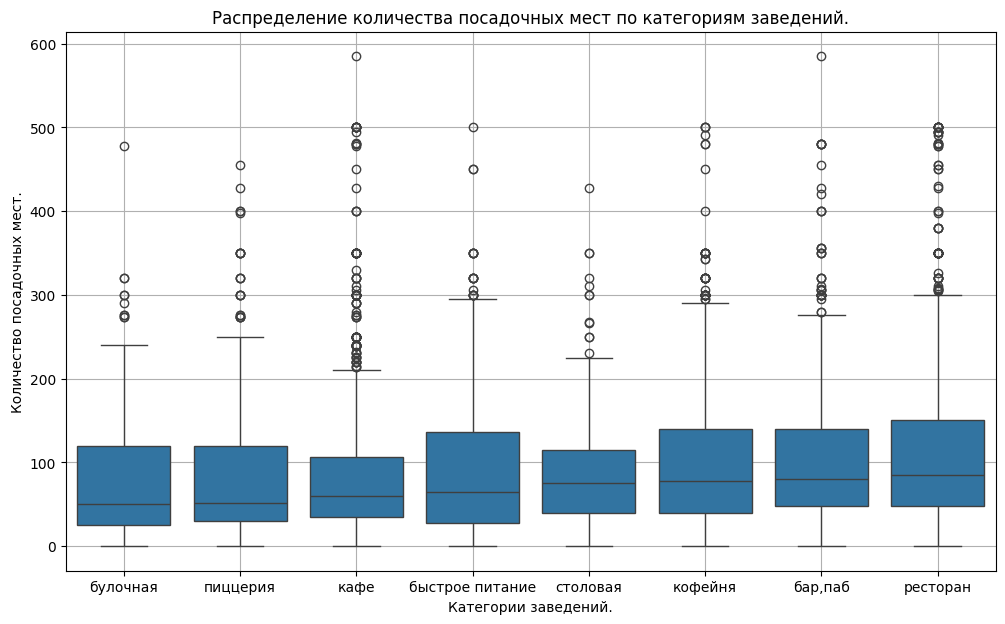

In [36]:
plt.figure(figsize=(12, 7))
sns.boxplot(x="category", y="seats", data=kafe_sit, order=order)
plt.title('Распределение количества посадочных мест по категориям заведений.')
plt.xticks(rotation=0)
plt.xlabel('Категории заведений.')
plt.ylabel('Количество посадочных мест.')
plt.grid()
plt.show()

Для более подробной визуализации "коробочки" со значениями Q1, Q2 и Q3, использую метод "plt.ylim()": ограничу значение количества посадочных мест до 200.

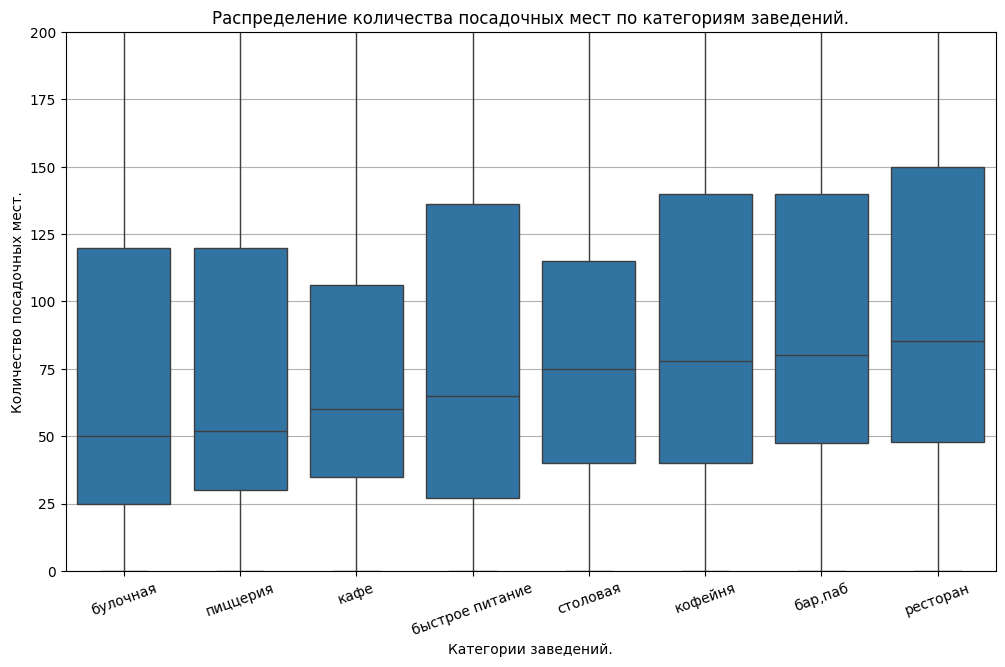

In [37]:
plt.figure(figsize=(12, 7))
sns.boxplot(x="category", y="seats", data=kafe_sit, order=order)
plt.title('Распределение количества посадочных мест по категориям заведений.')
plt.xticks(rotation=20)
plt.ylim(0, 200)
plt.xlabel('Категории заведений.')
plt.ylabel('Количество посадочных мест.')
plt.grid()
plt.show()

Вывод: Медианное значение количества посадочных мест больше всего в ресторанах, в барах, пабах и в кофейнях. Медианное значение количества посадочных мест меньше всего в булочных и в пиццериях.

#### Определяю и визуализирую долю количества посадочных мест по категориям заведений.

In [38]:
seats = kafe_sit.pivot_table(index='category', values='seats', aggfunc='sum')\
.sort_values(by='seats', ascending=False) # .reset_index()
seats

seats
category                 
ресторан         144285.0
кафе             108154.0
кофейня          74220.0 
бар,паб          50525.0 
пиццерия         37187.0 
быстрое питание  33473.0 
столовая         14534.0 
булочная         12604.0

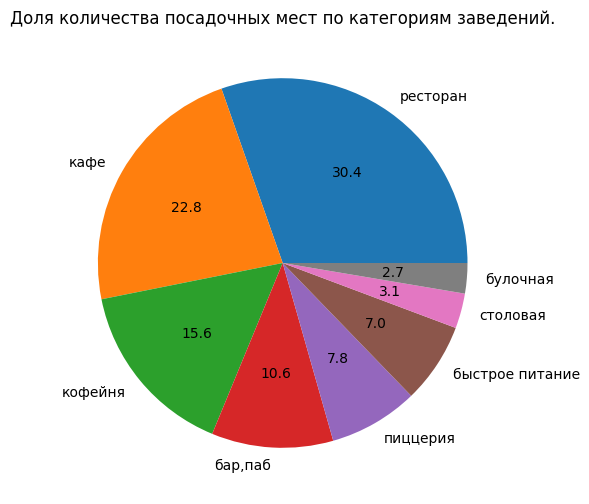

In [39]:
seats['seats'].plot(kind='pie', autopct='%.1f', subplots=True, legend=False, figsize=(6, 6))
plt.title('Доля количества посадочных мест по категориям заведений.')
plt.ylabel('')
plt.show()

**Вывод:** В процентном соотношении, больше всего посадочных мест в ресторанах - 30.4%, в кафе - 22.8% и в кофейнях - 15.6%. Меньше всего в столовых- 3.1% и в булочных - 2.7%.

### Рассмотрите и изобразите соотношение сетевых и несетевых заведений в датасете.

#### Каких заведений больше?

Добавляю в таблицу столбец "is_chain" со значениями: сетевое, не сетевое.

In [40]:
for i in range(len(kafe['chain'])):
    if kafe['chain'][i] == 1:
        kafe.loc[i, 'is_chain'] = 'сетевое'
    else:
        kafe.loc[i, 'is_chain'] = 'не сетевое'
        
kafe['is_chain'].value_counts()

is_chain
не сетевое    5198
сетевое       3204
Name: count, dtype: int64

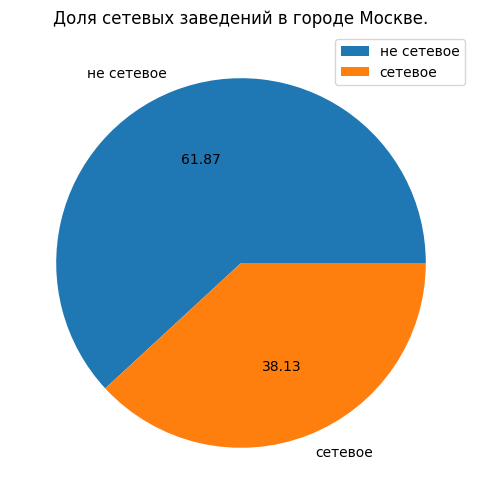

In [41]:
kafe['is_chain'].value_counts().plot(kind='pie',\
                autopct='%.2f', subplots=True, figsize=(6, 6), legend=True)
plt.title('Доля сетевых заведений в городе Москве.')
plt.ylabel('')
plt.show()

**Вывод:** На рынке общественного питания Москвы имеется 3204 заведения с сетевым статусом. Они занимают 38% рынка. Несетевых заведений почти в два раза больше 5198. Они составляют 62% от всех заведений.

#### Какие категории заведений чаще являются сетевыми? Исследуйте данные и ответьте на вопрос графиком.


Создам две таблицы: is_chain и not_chain. В них сохраню сгруппированное по категориям количество заведений отфильтрованных по признаку сетевое, несетевое, соответственно. Затем объединяю эти таблицы по столбцу 'category'.

In [42]:
is_chain = kafe.query('is_chain == "сетевое"').groupby(['category'])\
        .agg({'name': 'count'}).reset_index() # .sort_values(by='name', ascending=False)
not_chain = kafe.query('is_chain == "не сетевое"').groupby('category')\
        .agg({'name': 'count'}).reset_index() # .sort_values(by='name', ascending=False)
display(is_chain)
not_chain

category  name
0  бар,паб          169 
1  булочная         157 
2  быстрое питание  232 
3  кафе             779 
4  кофейня          720 
5  пиццерия         330 
6  ресторан         729 
7  столовая         88

category  name
0  бар,паб          596 
1  булочная         99  
2  быстрое питание  371 
3  кафе             1597
4  кофейня          693 
5  пиццерия         303 
6  ресторан         1312
7  столовая         227

In [43]:
about_chain = is_chain.merge(not_chain, on='category')
# меняю названия стобцов на более понятные
about_chain.rename(columns={'name_x': 'total_is_chain', 'name_y': 'total_not_chain'}, inplace=True)
about_chain

category  total_is_chain  total_not_chain
0  бар,паб          169             596            
1  булочная         157             99             
2  быстрое питание  232             371            
3  кафе             779             1597           
4  кофейня          720             693            
5  пиццерия         330             303            
6  ресторан         729             1312           
7  столовая         88              227

Добавляю два столбца: total - суммарное количество заведений по категориям; percent_is - процент сетевых заведений.

In [44]:
about_chain['total'] = about_chain['total_is_chain'] + about_chain['total_not_chain']
about_chain['percent_is'] = round(about_chain['total_is_chain'] / about_chain['total'] * 100, 2)
about_chain.reset_index(drop=True, inplace=True)
about_chain.sort_values(by ='percent_is', ascending=False)

category  total_is_chain  total_not_chain  total  percent_is
1  булочная         157             99               256    61.33     
5  пиццерия         330             303              633    52.13     
4  кофейня          720             693              1413   50.96     
2  быстрое питание  232             371              603    38.47     
6  ресторан         729             1312             2041   35.72     
3  кафе             779             1597             2376   32.79     
7  столовая         88              227              315    27.94     
0  бар,паб          169             596              765    22.09

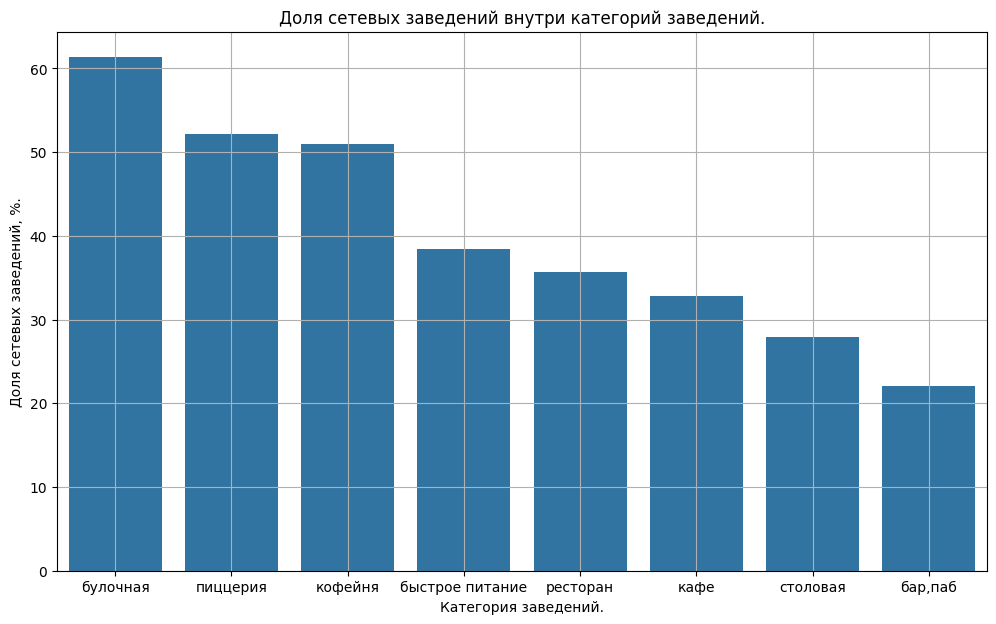

In [45]:
plt.figure(figsize=(12, 7))
sns.barplot(x='category', y='percent_is', data=about_chain.sort_values(by ='percent_is', ascending=False))
plt.title('Доля сетевых заведений внутри категорий заведений.')
plt.xlabel('Категория заведений.')
plt.ylabel('Доля сетевых заведений, %.')
plt.xticks(rotation=0)
plt.grid()

plt.show()

Вывод: Категория булочная имеет наибольшую долю сетевых заведений внутри категории. За ней на втором месте пиццерия и на третьем кофейня. Минимальная доля сетевых заведений в категории у столовых и у баров, пабов.

### Сгруппируйте данные по названиям заведений и найдите топ-15 популярных сетей в Москве. Постройте подходящую для такой информации визуализацию. Знакомы ли вам эти сети? Есть ли какой-то признак, который их объединяет?

In [46]:
top15 = kafe.query('is_chain == "сетевое"').pivot_table(index=['name', 'category'], values='address', aggfunc='count')\
.sort_values(by='address', ascending=False)
top15.head(15)

address
name                                category         
шоколадница                         кофейня   119    
домино'с пицца                      пиццерия  76     
додо пицца                          пиццерия  74     
one price coffee                    кофейня   71     
яндекс лавка                        ресторан  69     
cofix                               кофейня   65     
prime                               ресторан  49     
кофепорт                            кофейня   42     
кулинарная лавка братьев караваевых кафе      39     
теремок                             ресторан  36     
cofefest                            кофейня   31     
чайхана                             кафе      26     
буханка                             булочная  25     
drive café                          кафе      24     
кофемания                           кофейня   22

In [47]:
fig = px.bar(top15.head(15).reset_index(),
            x = 'name',
            y = 'address',
            title = 'Пятнадцать самых популярных сетей Москвы',
            template = 'ggplot2',
            # color='name'
            )

fig.update_layout(xaxis_title = 'Название сети',
                 yaxis_title = 'Количество заведений')
fig.update_traces(hovertemplate ='Название сети : %{x} <br>Количество: %{y}')

fig.show()

**Вывод:**  Самые популярные сети заведений общественного питания в городе Москве: **шоколадница, домино'с пицца, додо пицца, one price coffee, яндекс лавка, cofix, prime, кофепорт, кулинарная лавка братьев караваевых, теремок, cofefest, чайхана, буханка, drive café, кофемания**. Да, эти сети мне знакомы: их вывески встречаются в самых разных местах города: в парках, у вокзалов, в аэропортах. Сети имеют один главный объединяющий признак: название. Но, они ещё характеризуются централизованным управлением, общей ценовой и ассортиментной политикой, едиными стандартами. Торговые сети - способ мультипликации бизнеса, позволяющий увеличить доходы путём расширения географии охвата покупателей, оптимизации логистики и унификации администрирования бизнеса.

#### К какой категории заведений они относятся? Отобразите общее количество заведений и количество заведений каждой категории.

По условиям задания: "К какой категории заведений они относятся? Отобразите общее количество заведений и количество заведений каждой категории".
Группирую количество заведений в Топ-15 по категориям заведений, затем сортирую и визуализирую результат.

In [48]:
top_15_cat = top15.head(15).pivot_table(index='category', values='address', aggfunc='count')
sort_top_15_cat = top_15_cat.sort_values(by='address', ascending=False)
sort_top_15_cat

address
category         
кофейня   6      
кафе      3      
ресторан  3      
пиццерия  2      
булочная  1

In [49]:
fig = px.bar(sort_top_15_cat.reset_index(),
            x = 'category',
            y = 'address',
            title = 'К каким категориям заведений относятся пятнадцать самых популярных сетей Москвы?',
            template = 'ggplot2',
            # color='category'
            )

fig.update_layout(xaxis_title = 'Название категории.',
                 yaxis_title = 'Количество заведений.')
fig.update_traces(hovertemplate ='Название заведения : %{x} <br>Количество: %{y}')

fig.show()

Вывод: В Топ-15 самых популярных сетей Москвы больше всего сетей работающих в категории кофейн - 6 сетей. Затем, с большим отрывом следуют сети с категориями кафе и рестораны - по три сети. Пиццерий всего две сети и булочная - одна сеть.

### Какие административные районы Москвы присутствуют в датасете?

In [50]:
kafe['district'].value_counts()

district
Центральный административный округ         2242
Северный административный округ            898 
Южный административный округ               892 
Северо-Восточный административный округ    890 
Западный административный округ            850 
Восточный административный округ           798 
Юго-Восточный административный округ       714 
Юго-Западный административный округ        709 
Северо-Западный административный округ     409 
Name: count, dtype: int64

**Вывод:** В датасете присутствует 9 административных районов Москвы:
* Центральный административный округ       
* Северный административный округ           
* Южный административный округ               
* Северо-Восточный административный округ    
* Западный административный округ            
* Восточный административный округ          
* Юго-Восточный административный округ      
* Юго-Западный административный округ       
* Северо-Западный административный округ 

#### Отобразите общее количество заведений по районам города.

In [51]:
kafe_on_district = kafe.groupby(['district'])\
.agg({'name': 'count'}).reset_index().sort_values(by='name', ascending=False)
kafe_on_district.rename(columns={'name': 'total_per_district'}, inplace=True)
# kafe_on_district.head(10)

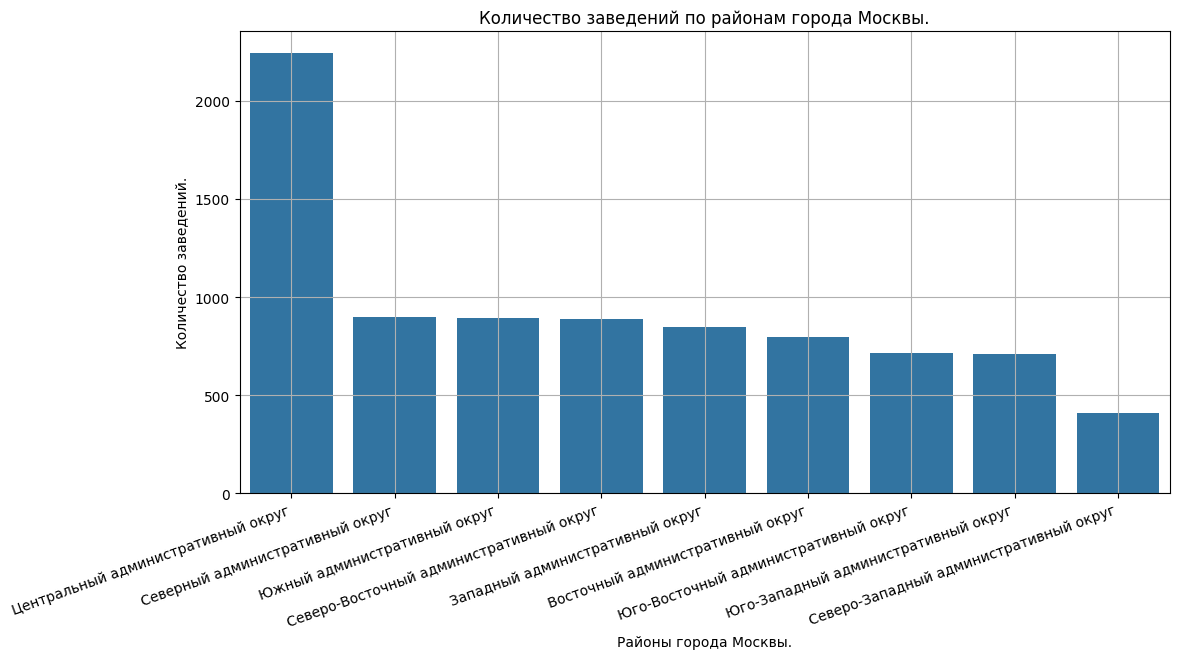

In [52]:
plt.figure(figsize=(12, 6))
sns.barplot(x='district', y='total_per_district', data=kafe_on_district)
plt.title('Количество заведений по районам города Москвы.')
plt.xlabel('Районы города Москвы.')
plt.ylabel('Количество заведений.')
plt.xticks(rotation=20, horizontalalignment="right")
plt.grid()
plt.show()

**Вывод:** Больше всего заведений в Центральном административном округе. В остальных округах значение примерно одинаковое за исключением Северо-Западного административного округа, где заведений значительно меньше.
Заведения общественного питания распределены по городу следующим образом: 
* Центральный административный округ         2242 заведений,
* Северный административный округ            898 заведений,
* Южный административный округ               892 заведений,
* Северо-Восточный административный округ    890 заведений,
* Западный административный округ            850 заведений,
* Восточный административный округ           798 заведений,
* Юго-Восточный административный округ       714 заведений,
* Юго-Западный административный округ        709 заведений,
* Северо-Западный административный округ     409 заведений. 

#### Визуализирую количество заведений каждой категории по районам города. Пробую визуализировать общее количество заведений и количество заведений каждой категории по районам, одним графиком.

In [53]:
district_kafe_cat = kafe.groupby(['district', 'category'])\
.agg({'name': 'count'}).reset_index().sort_values(by='name', ascending=False)
district_kafe_cat.rename(columns={'name': 'total'}, inplace=True)

In [54]:
kafe_district_cat = district_kafe_cat.groupby(['district', 'category'])\
.agg({'total': 'sum'}).unstack().fillna(0)
kafe_district_cat.reset_index()

district   total           \
category                                          бар,паб булочная   
0         Восточный административный округ         53      25        
1         Западный административный округ          50      37        
2         Северный административный округ          68      39        
3         Северо-Восточный административный округ  63      28        
4         Северо-Западный административный округ   23      12        
5         Центральный административный округ       364     50        
6         Юго-Восточный административный округ     38      13        
7         Юго-Западный административный округ      38      27        
8         Южный административный округ             68      25        

                                                                  
category быстрое питание кафе кофейня пиццерия ресторан столовая  
0         71              272  105     72       160      40       
1         62              238  150     71       218      24       
2         58              234  193     77       188      41       
3         82              269  159     68       181      40       
4         30              115  62      40       109      18       
5         87              464  428     113      670      66       
6         67              282  89      55       145      25       
7         61              238  96      64       168      17       
8         85              264  131     73       202      44

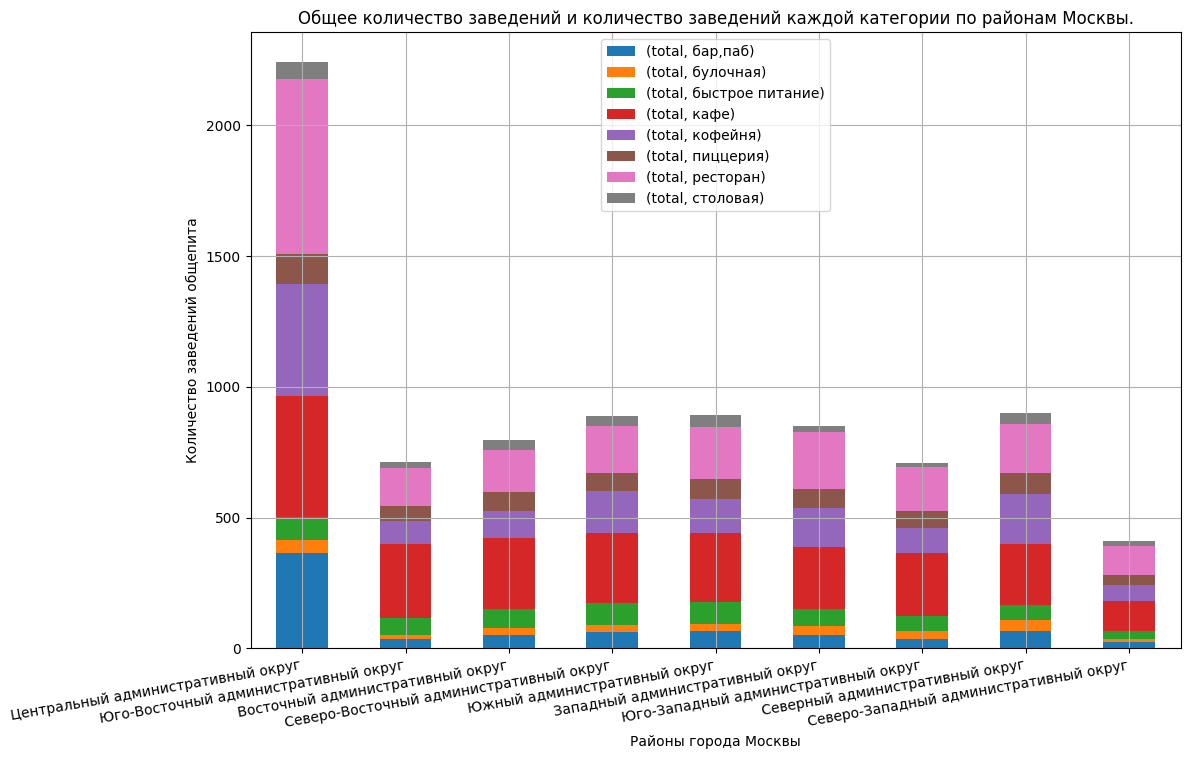

In [55]:
kafe_district_cat.sort_values(by=('total', 'кафе'), ascending=False)\
.plot(kind='bar', stacked=True, figsize=(12, 8), grid=True)

plt.title('Общее количество заведений и количество заведений каждой категории по районам Москвы.')
plt.xticks(rotation=10, ha='center', horizontalalignment='right')
plt.xlabel('Районы города Москвы')
plt.ylabel('Количество заведений общепита')
plt.legend(loc='upper center')
plt.show()

**Вывод:** Этот график подробно отображает количество заведений по категориям в районах города и одновременно показывает значение общего количества заведений в каждом районе.Здесь можно увидеть абсолютное превосходство Центрального административного округа, как по общему количеству, так и по категориям. Интересно выглядит сходство распределения по остальным округам, за исключением Северо-Западного административного округа, где заведений значительно меньше по всем категориям.

### Визуализируйте распределение средних рейтингов по категориям заведений. Сильно ли различаются усреднённые рейтинги в разных типах общепита?

#### Как сильно различаются усреднённые рейтинги в разных категориях общепита?

In [56]:
kafe.pivot_table(index='category', values='rating', aggfunc='describe')

25%  50%  75%   count  max      mean  min       std
category                                                            
бар,паб          4.3  4.4  4.6  765.0   5.0  4.387712  1.1  0.380143
булочная         4.2  4.3  4.4  256.0   5.0  4.268359  1.3  0.386303
быстрое питание  3.9  4.2  4.3  603.0   5.0  4.050249  1.1  0.560949
кафе             4.0  4.2  4.4  2376.0  5.0  4.124285  1.0  0.566001
кофейня          4.1  4.3  4.4  1413.0  5.0  4.277282  1.4  0.372250
пиццерия         4.2  4.3  4.4  633.0   5.0  4.301264  1.0  0.336162
ресторан         4.2  4.3  4.5  2041.0  5.0  4.290348  1.0  0.413237
столовая         4.1  4.3  4.4  315.0   5.0  4.211429  1.0  0.454205

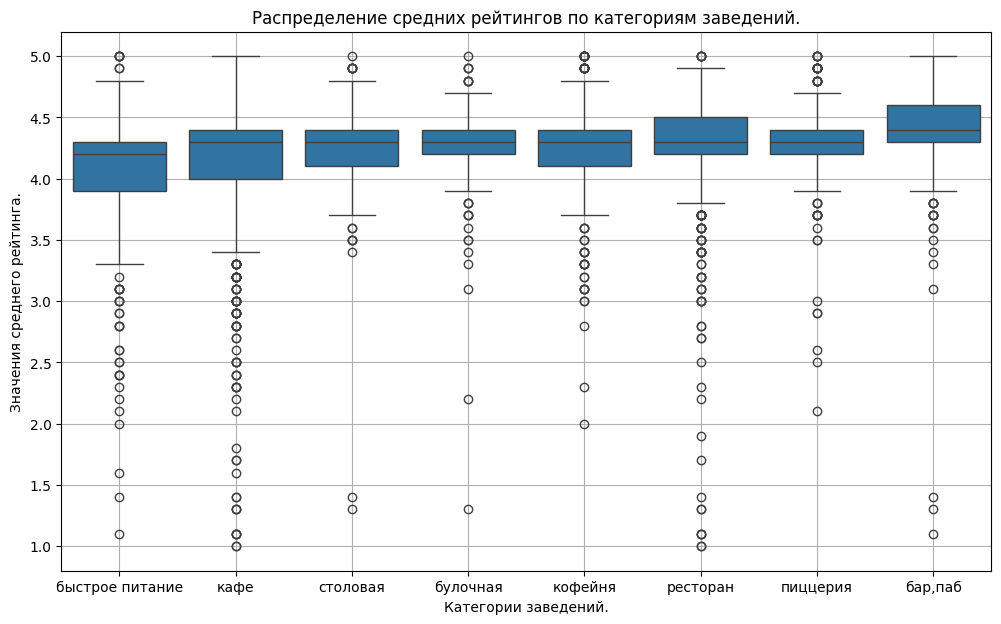

In [57]:
# с помощью параметра order сортирую по средним значениям
order = kafe.groupby('category').agg({'rating': 'mean'}).sort_values('rating').index.tolist()
plt.figure(figsize=(12, 7))
sns.boxplot(x='category', y='rating', data=kafe_sit, order=order)
plt.title('Распределение средних рейтингов по категориям заведений.')
plt.xticks(rotation=0)
plt.xlabel('Категории заведений.')
plt.ylabel('Значения среднего рейтинга.')
plt.grid()
plt.show()

**Вывод:** Наиболее высокие средние рейтинги  у баров, пабов.
 Рестораны, кофейни, пиццерии, столовые и булочные имеют почти равные рейтинги.
 Хуже всего с рейтингами  у кафе и у заведений быстрого питания. Только 105 из 8402 заведений в нашем исследовании, удостоены оценки «5» , что составляет 1,25%.

### Найдите топ-15 улиц по количеству заведений. Постройте график распределения количества заведений и их категорий по этим улицам. Попробуйте проиллюстрировать эту информацию одним графиком.

In [58]:
top_streets = kafe.query('street != "неизвестно"').pivot_table(index=['street'],\
            values='name', aggfunc='count').sort_values(by='name', ascending=False)
top_streets.rename(columns={'name': 'total'}, inplace=True)
top_15 = top_streets.head(15)
top_15

total
street                       
проспект мира           183  
профсоюзная улица       122  
проспект вернадского    108  
ленинский проспект      107  
ленинградский проспект  95   
дмитровское шоссе       88   
каширское шоссе         77   
варшавское шоссе        75   
ленинградское шоссе     69   
люблинская улица        60   
улица вавилова          55   
кутузовский проспект    54   
улица миклухо-маклая    49   
пятницкая улица         48   
алтуфьевское шоссе      47

In [59]:
# вывожу список топ-15 улиц по количеству заведений
top15_streets = top_15.reset_index()
list_15= list(top15_streets['street'])
print(f'Топ-15 улиц по количеству заведений: {list_15}.')

Топ-15 улиц по количеству заведений: ['проспект мира', 'профсоюзная улица', 'проспект вернадского', 'ленинский проспект', 'ленинградский проспект', 'дмитровское шоссе', 'каширское шоссе', 'варшавское шоссе', 'ленинградское шоссе', 'люблинская улица', 'улица вавилова', 'кутузовский проспект', 'улица миклухо-маклая', 'пятницкая улица', 'алтуфьевское шоссе'].


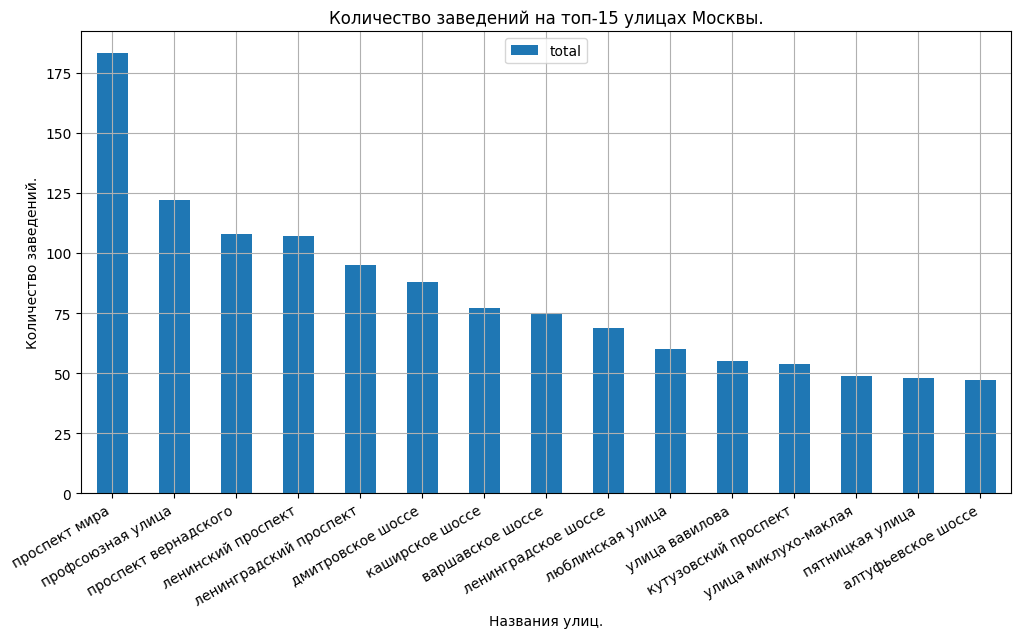

In [60]:
top_streets.head(15).plot(kind='bar', figsize=(12, 6), grid=True)

plt.title('Количество заведений на топ-15 улицах Москвы.')
plt.xticks(rotation=30, ha='center', horizontalalignment='right')
plt.xlabel('Названия улиц.')
plt.ylabel('Количество заведений.')
plt.legend(loc='upper center')
plt.show()

**Вывод:** Топ-15 улиц по количеству заведений: проспект мира, профсоюзная улица, проспект вернадского, ленинский проспект, ленинградский проспект, дмитровское шоссе, каширское шоссе, варшавское шоссе, ленинградское шоссе, люблинская улица, улица вавилова, кутузовский проспект, улица миклухо-маклая, пятницкая улица, алтуфьевское шоссе. 

In [61]:
top_15_cat = kafe.query("street == @list_15")\
        .groupby(['street', 'category']).agg({'name': 'count'}).reset_index()
top_15_cat.rename(columns={'name': 'total'}, inplace=True)
top_15_cat.sort_values(by=['street', 'total'], ascending=True)

street         category  total
1    алтуфьевское шоссе      булочная         1    
7    алтуфьевское шоссе      столовая         1    
5    алтуфьевское шоссе      пиццерия         3    
0    алтуфьевское шоссе      бар,паб          5    
2    алтуфьевское шоссе      быстрое питание  5    
4    алтуфьевское шоссе      кофейня          9    
6    алтуфьевское шоссе      ресторан         10   
3    алтуфьевское шоссе      кафе             13   
12   варшавское шоссе        пиццерия         4    
8    варшавское шоссе        бар,паб          6    
9    варшавское шоссе        быстрое питание  7    
14   варшавское шоссе        столовая         7    
11   варшавское шоссе        кофейня          14   
10   варшавское шоссе        кафе             17   
13   варшавское шоссе        ресторан         20   
16   дмитровское шоссе       булочная         2    
22   дмитровское шоссе       столовая         4    
15   дмитровское шоссе       бар,паб          6    
20   дмитровское шоссе       пиццерия         8    
17   дмитровское шоссе       быстрое питание  10   
19   дмитровское шоссе       кофейня          11   
18   дмитровское шоссе       кафе             23   
21   дмитровское шоссе       ресторан         24   
23   каширское шоссе         бар,паб          2    
27   каширское шоссе         пиццерия         5    
29   каширское шоссе         столовая         5    
24   каширское шоссе         быстрое питание  10   
26   каширское шоссе         кофейня          16   
28   каширское шоссе         ресторан         19   
25   каширское шоссе         кафе             20   
31   кутузовский проспект    булочная         1    
30   кутузовский проспект    бар,паб          2    
32   кутузовский проспект    быстрое питание  2    
35   кутузовский проспект    пиццерия         3    
37   кутузовский проспект    столовая         3    
34   кутузовский проспект    кофейня          13   
33   кутузовский проспект    кафе             14   
36   кутузовский проспект    ресторан         16   
40   ленинградский проспект  быстрое питание  2    
45   ленинградский проспект  столовая         3    
39   ленинградский проспект  булочная         4    
43   ленинградский проспект  пиццерия         9    
41   ленинградский проспект  кафе             12   
38   ленинградский проспект  бар,паб          15   
42   ленинградский проспект  кофейня          25   
44   ленинградский проспект  ресторан         25   
47   ленинградское шоссе     булочная         2    
51   ленинградское шоссе     пиццерия         3    
53   ленинградское шоссе     столовая         3    
46   ленинградское шоссе     бар,паб          5    
48   ленинградское шоссе     быстрое питание  5    
49   ленинградское шоссе     кафе             13   
50   ленинградское шоссе     кофейня          13   
52   ленинградское шоссе     ресторан         25   
56   ленинский проспект      быстрое питание  2    
55   ленинский проспект      булочная         3    
59   ленинский проспект      пиццерия         5    
61   ленинский проспект      столовая         5    
54   ленинский проспект      бар,паб          10   
58   ленинский проспект      кофейня          23   
57   ленинский проспект      кафе             26   
60   ленинский проспект      ресторан         33   
66   люблинская улица        пиццерия         1    
68   люблинская улица        столовая         2    
62   люблинская улица        бар,паб          5    
63   люблинская улица        быстрое питание  5    
67   люблинская улица        ресторан         10   
65   люблинская улица        кофейня          11   
64   люблинская улица        кафе             26   
70   проспект вернадского    булочная         1    
76   проспект вернадского    столовая         2    
69   проспект вернадского    бар,паб          7    
71   проспект вернадского    быстрое питание  12   
74   проспект вернадского    пиццерия         12   
73   проспект вернадского    кофейня          16   
72   проспект вернадского    кафе             25   
75   проспект вер

In [62]:
top15_streets_cat = top_15_cat.groupby(['street', 'category']).agg({'total': 'sum'}).unstack().fillna(0)
top15_streets_cat.reset_index().sort_values(by=('total', 'ресторан'), ascending=False)

street   total                                 \
category                         бар,паб булочная быстрое питание  кафе   
10        проспект мира           12.0    4.0      21.0            53.0   
7         ленинский проспект      10.0    3.0      2.0             26.0   
9         проспект вернадского    7.0     1.0      12.0            25.0   
11        профсоюзная улица       6.0     4.0      15.0            35.0   
5         ленинградский проспект  15.0    4.0      2.0             12.0   
6         ленинградское шоссе     5.0     2.0      5.0             13.0   
2         дмитровское шоссе       6.0     2.0      10.0            23.0   
1         варшавское шоссе        6.0     0.0      7.0             17.0   
3         каширское шоссе         2.0     0.0      10.0            20.0   
12        пятницкая улица         9.0     3.0      2.0             7.0    
4         кутузовский проспект    2.0     1.0      2.0             14.0   
14        улица миклухо-маклая    3.0     0.0      4.0             21.0   
13        улица вавилова          2.0     2.0      11.0            15.0   
0         алтуфьевское шоссе      5.0     1.0      5.0             13.0   
8         люблинская улица        5.0     0.0      5.0             26.0   

                                             
category кофейня пиццерия ресторан столовая  
10        36.0    11.0     44.0     2.0      
7         23.0    5.0      33.0     5.0      
9         16.0    12.0     33.0     2.0      
11        18.0    15.0     26.0     3.0      
5         25.0    9.0      25.0     3.0      
6         13.0    3.0      25.0     3.0      
2         11.0    8.0      24.0     4.0      
1         14.0    4.0      20.0     7.0      
3         16.0    5.0      19.0     5.0      
12        6.0     3.0      18.0     0.0      
4         13.0    3.0      16.0     3.0      
14        4.0     2.0      15.0     0.0      
13        10.0    3.0      12.0     0.0      
0         9.0     3.0      10.0     1.0      
8         11.0    1.0      10.0     2.0

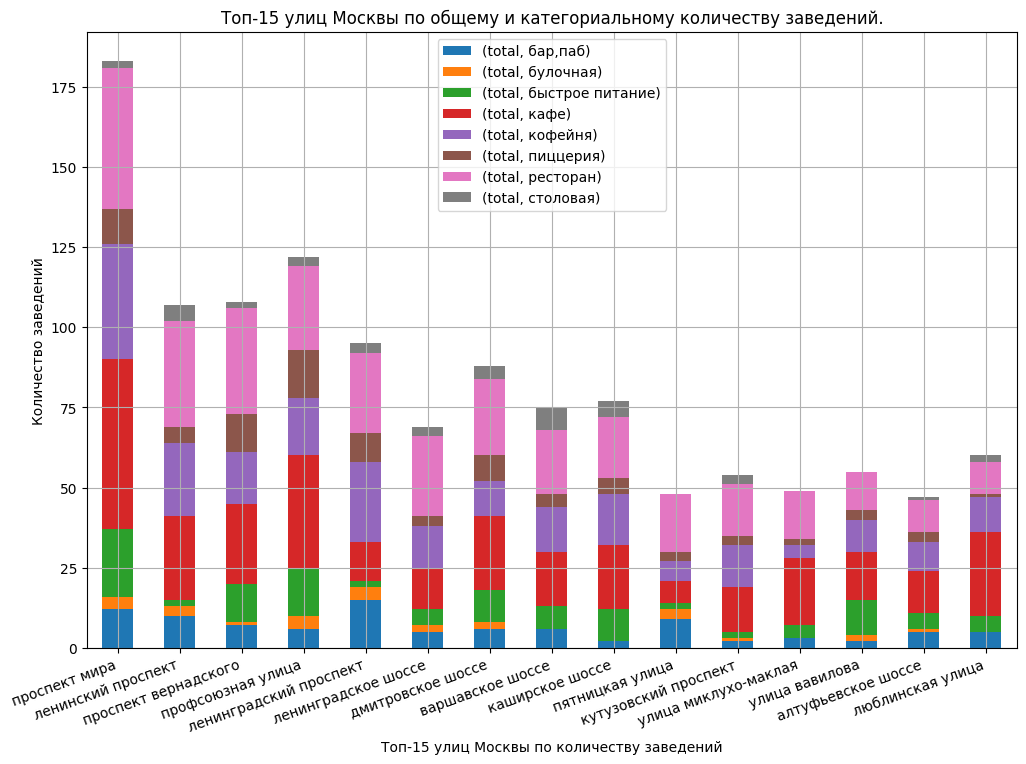

In [63]:
top15_streets_cat.sort_values(by=('total', 'ресторан'), ascending=False)\
.plot(kind='bar', stacked=True, figsize=(12, 8), grid=True)

plt.title('Топ-15 улиц Москвы по общему и категориальному количеству заведений.')
plt.xticks(rotation=20, ha='center', horizontalalignment='right')
plt.xlabel('Топ-15 улиц Москвы по количеству заведений')
plt.ylabel('Количество заведений')
plt.legend(loc='upper center')
plt.show()

**Вывод:** Среди топ-15 улиц по количеству заведений, проспект мира является бесспорным лидером по общему количеству заведений. В разрезе категорий, проспект мира лидирует в 6 из 8 категорий.

### Найдите улицы, на которых находится только один объект общепита. Что можно сказать об этих заведениях?

In [64]:
one_streets = kafe.query('street != "неизвестно"').pivot_table(index=['street'], values='name', aggfunc='count')\
.sort_values(by='name', ascending=False).reset_index()
# переименую столбец name на total
one_streets.rename(columns={'name': 'total'}, inplace=True)
one_kafe = one_streets.query('total == 1')
print(f'Вывод: На {len(one_kafe)} улицах имеется только один объект общественного питания.')

Вывод: На 434 улицах имеется только один объект общественного питания.


In [65]:
kafe_unique = list(one_kafe['street'])
print(f'Список улиц, на которых находится только один объект общепита: {kafe_unique}.')

Список улиц, на которых находится только один объект общепита: ['проточный переулок', 'улица раевского', '43-й километр', '46-й километр', '5-й квартал', 'северный бульвар', '5-й проезд подбельского', '1-й курьяновский проезд', 'пожарский переулок', 'улица полины осипенко', 'улица поликарпова', '5-я магистральная улица', '5-я улица ямского поля', '1-й котляковский переулок', '53-й километр', '6-й лучевой просек', '6-я парковая улица', '1-й колобовский переулок', 'улица пивченкова', '1-й кирпичный переулок', 'улица петра романова', '65-й километр', 'улица паустовского', '41-й километр', '4-я улица 8 марта', '3-я радиаторская улица', 'улица садовники', '3-я фрунзенская улица', 'электрический переулок', 'путевой проезд', 'полоцкая улица', 'светлогорский проезд', 'улица седова', '4-й воробьёвский проезд', 'улица саморы машела', 'улица самеда вургуна', 'улица саляма адиля', 'раушская набережная', 'улица расковой', 'улица россолимо', 'улица рокотова', 'улица розанова', '4-й лесной переулок',

**Что можно сказать об этих заведениях?**

Общее количество единственных заведений на одной улице по категориям.

In [66]:
unique_per_street = kafe.query("street == @kafe_unique").pivot_table(index=['category'], values='name', aggfunc='count')\
.reset_index().sort_values(by='name', ascending=False)
# переименую столбец name на total
unique_per_street.rename(columns={'name': 'total'}, inplace=True)
unique_per_street

category  total
3  кафе             149  
6  ресторан         90   
4  кофейня          78   
0  бар,паб          40   
7  столовая         36   
2  быстрое питание  18   
5  пиццерия         14   
1  булочная         9

**Вывод:** На 434 улицах города Москвы имеется только один объект общественного питания. Наиболее часто среди "единственных" заведений встречаются кафе, рестораны и кофейни.

#### Изучу количество единственных на одной улице заведений по категориям и по районам Москвы.

Общее количество единственных на одной улице заведений по районам Москвы.

In [67]:
one_per_street = kafe.query("street == @kafe_unique")\
.pivot_table(index=['district'], values='name', aggfunc='count').reset_index()
# переименую столбец name на total
one_per_street.rename(columns={'name': 'total'}, inplace=True)
one_per_street.sort_values(by='total', ascending=False)

district  total
5  Центральный административный округ       136  
0  Восточный административный округ         54   
3  Северо-Восточный административный округ  49   
2  Северный административный округ          48   
1  Западный административный округ          37   
8  Южный административный округ             37   
6  Юго-Восточный административный округ     36   
4  Северо-Западный административный округ   19   
7  Юго-Западный административный округ      18

**Вывод:** Лидерами по количеству улиц с "единственным" заведением являются Центральный административный округ с 136 такими заведениями и Восточный административный округ с 54. Меньше всего таких улиц в Северо-Западном административном округе - всего 19, и  в Юго-Западном административном округе - всего 18.

#### Количество единственных на одной улице заведений по категориям и по районам Москвы.

In [68]:
district_cat = kafe.query("street == @kafe_unique").pivot_table(index=['district', 'category'], values='name', aggfunc='count').reset_index()
district_cat.rename(columns={'name': 'total'}, inplace=True)
district_cat

district         category  total
0   Восточный административный округ         бар,паб          3    
1   Восточный административный округ         булочная         1    
2   Восточный административный округ         быстрое питание  5    
3   Восточный административный округ         кафе             18   
4   Восточный административный округ         кофейня          9    
5   Восточный административный округ         пиццерия         6    
6   Восточный административный округ         ресторан         7    
7   Восточный административный округ         столовая         5    
8   Западный административный округ          бар,паб          5    
9   Западный административный округ          булочная         3    
10  Западный административный округ          быстрое питание  2    
11  Западный административный округ          кафе             14   
12  Западный административный округ          кофейня          2    
13  Западный административный округ          пиццерия         2    
14  Западный административный округ          ресторан         8    
15  Западный административный округ          столовая         1    
16  Северный административный округ          бар,паб          2    
17  Северный административный округ          булочная         2    
18  Северный административный округ          быстрое питание  1    
19  Северный административный округ          кафе             20   
20  Северный административный округ          кофейня          10   
21  Северный административный округ          пиццерия         1    
22  Северный административный округ          ресторан         6    
23  Северный административный округ          столовая         6    
24  Северо-Восточный административный округ  бар,паб          2    
25  Северо-Восточный административный округ  быстрое питание  3    
26  Северо-Восточный административный округ  кафе             15   
27  Северо-Восточный административный округ  кофейня          7    
28  Северо-Восточный административный округ  пиццерия         2    
29  Северо-Восточный административный округ  ресторан         13   
30  Северо-Восточный административный округ  столовая         7    
31  Северо-Западный административный округ   бар,паб          1    
32  Северо-Западный административный округ   быстрое питание  1    
33  Северо-Западный административный округ   кафе             3    
34  Северо-Западный административный округ   кофейня          4    
35  Северо-Западный административный округ   ресторан         8    
36  Северо-Западный административный округ   столовая         2    
37  Центральный административный округ       бар,паб          22   
38  Центральный административный округ       булочная         2    
39  Центральный административный округ       быстрое питание  2    
40  Центральный административный округ       кафе             34   
41  Центральный административный округ       кофейня          33   
42  Центральный административный округ       пиццерия         2    
43  Центральный административный округ       ресторан         35   
44  Центральный административный округ       столовая         6    
45  Юго-Восточный административный округ     бар,паб          5    
46  Юго-Восточный административный округ     быстрое питание  1    
47  Юго-Восточный административный округ     кафе             18   
48  Юго-Восточный административный округ     кофейня          5    
49  Юго-Восточный административный округ     пиццерия         1    
50  Юго-Восточный административный округ     ресторан         4    
51  Юго-Восточный административный округ     столовая         2    
52  Юго-Западный административный округ      быстрое питание  2    
53  Юго-Западный административный округ      кафе             8    
54  Юго-Западный административный округ      кофейня          5    
55  Юго-Западный административный округ      ресторан         1    
56  Юго-Западный административный округ      столовая         2    
57  Южный административный округ             булочная         1    
58  Южный административ

In [69]:
streets_cat = district_cat.groupby(['district', 'category']).agg({'total': 'sum'}).unstack().fillna(0)
streets_cat.reset_index()

district   total           \
category                                          бар,паб булочная   
0         Восточный административный округ         3.0     1.0       
1         Западный административный округ          5.0     3.0       
2         Северный административный округ          2.0     2.0       
3         Северо-Восточный административный округ  2.0     0.0       
4         Северо-Западный административный округ   1.0     0.0       
5         Центральный административный округ       22.0    2.0       
6         Юго-Восточный административный округ     5.0     0.0       
7         Юго-Западный административный округ      0.0     0.0       
8         Южный административный округ             0.0     1.0       

                                                                   
category быстрое питание  кафе кофейня пиццерия ресторан столовая  
0         5.0             18.0  9.0     6.0      7.0      5.0      
1         2.0             14.0  2.0     2.0      8.0      1.0      
2         1.0             20.0  10.0    1.0      6.0      6.0      
3         3.0             15.0  7.0     2.0      13.0     7.0      
4         1.0             3.0   4.0     0.0      8.0      2.0      
5         2.0             34.0  33.0    2.0      35.0     6.0      
6         1.0             18.0  5.0     1.0      4.0      2.0      
7         2.0             8.0   5.0     0.0      1.0      2.0      
8         1.0             19.0  3.0     0.0      8.0      5.0

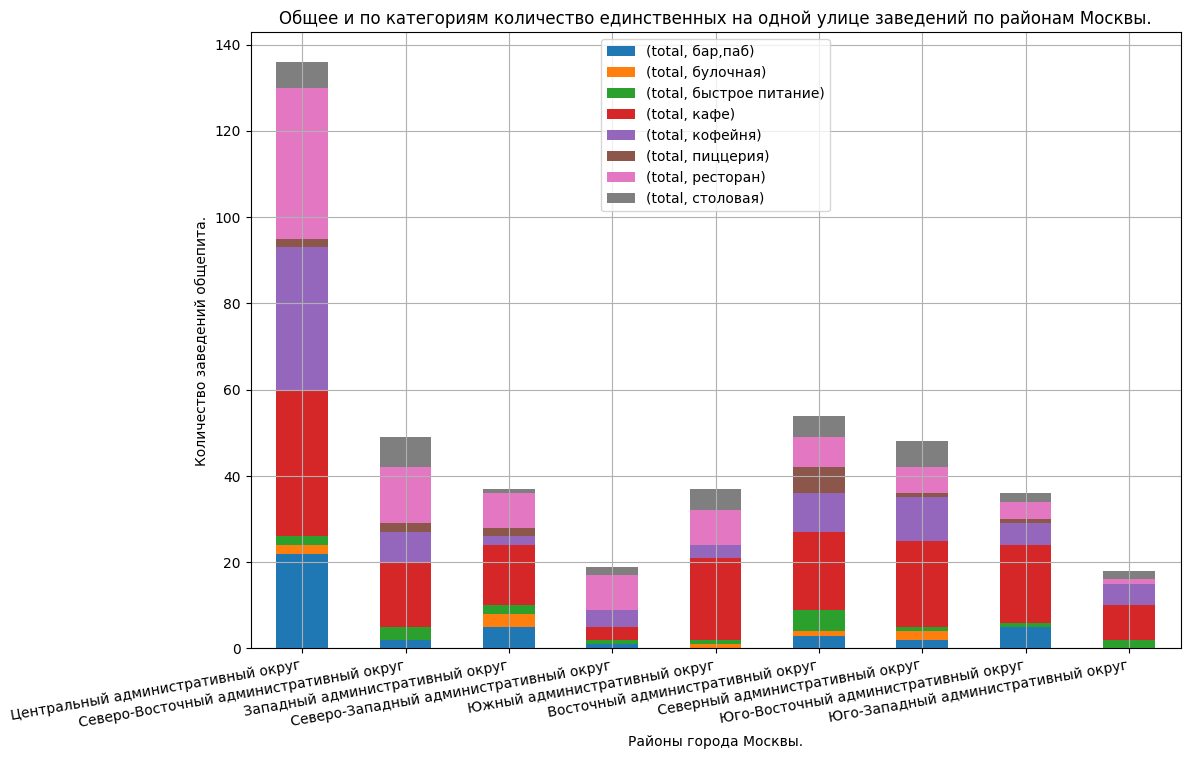

In [70]:
streets_cat.sort_values(by=('total', 'ресторан'), ascending=False)\
.plot(kind='bar', stacked=True, figsize=(12, 8), grid=True)

plt.title('Общее и по категориям количество единственных на одной улице заведений по районам Москвы.')
plt.xticks(rotation=10, horizontalalignment='right')
plt.xlabel('Районы города Москвы.')
plt.ylabel('Количество заведений общепита.')
plt.legend(loc='upper center')
plt.show()

**Вывод:** Лидером по количеству улиц с "единственным" заведением является Центральный административный округ как по общему количеству "единственных" заведений, так и по категориям. Значения Северо-Западного административного округа и Юго-Западного административного округа самые меньшие и схожи по объёму но сильно отличаются по категориям.

### Значения средних чеков заведений хранятся в столбце middle_avg_bill. Эти числа показывают примерную стоимость заказа в рублях, которая чаще всего выражена диапазоном. Проанализируйте цены в центральном административном округе и других. Как удалённость от центра влияет на цены в заведениях?

**Посчитайте медиану этого столбца для каждого района. Используйте это значение в качестве ценового индикатора района.**

In [71]:
kafe_avg_bill = kafe.query('middle_avg_bill.notnull()')
price_district_ind = kafe_avg_bill.groupby('district', as_index=False)['middle_avg_bill']\
                        .agg('median').sort_values(by='middle_avg_bill', ascending=False)
price_district_ind

district  middle_avg_bill
1  Западный административный округ          1000.0         
5  Центральный административный округ       1000.0         
4  Северо-Западный административный округ   700.0          
2  Северный административный округ          650.0          
7  Юго-Западный административный округ      600.0          
0  Восточный административный округ         575.0          
3  Северо-Восточный административный округ  500.0          
8  Южный административный округ             500.0          
6  Юго-Восточный административный округ     450.0

**Вывод:** Значение средних чеков выше всего в Западном административном округе и в Центральном административном округе - 1000 рублей. 
* В Северо-Западном административном округе - 700.0, в Северном административном округе - 650.0 и в Юго-Западном административном округе -	600.0 рублей. 
* Северо-Восточный административный округ - 500.0, Южный административный округ - 500.0 и Юго-Восточный административный округ - 450 рублей показывают найменьшие значения средних чеков.

#### Проанализируйте цены в центральном административном округе и в других. Как удалённость от центра влияет на цены в заведениях?

In [72]:
district_prices_cat = kafe.groupby(['category', 'district'])\
.agg({'middle_avg_bill': 'median'}).reset_index().sort_values(by='category', ascending=False)
district_prices_cat.rename(columns={'middle_avg_bill': 'prices'}, inplace=True)
district_prices_cat.head(9)

category                                 district  prices
71  столовая  Южный административный округ             282.5 
70  столовая  Юго-Западный административный округ      305.0 
69  столовая  Юго-Восточный административный округ     275.0 
68  столовая  Центральный административный округ       300.0 
67  столовая  Северо-Западный административный округ   300.0 
66  столовая  Северо-Восточный административный округ  275.0 
65  столовая  Северный административный округ          300.0 
64  столовая  Западный административный округ          300.0 
63  столовая  Восточный административный округ         300.0

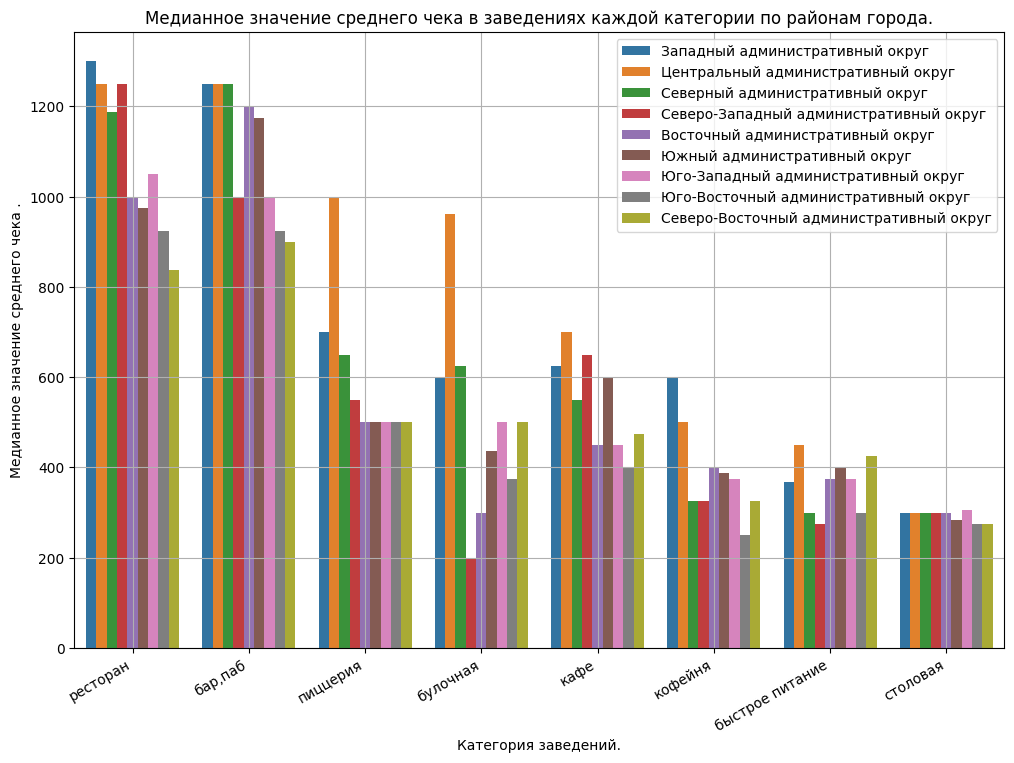

In [73]:
plt.figure(figsize=(12, 8))
sns.barplot(x='category', y='prices', 
            hue='district', 
            data=district_prices_cat.sort_values(by='prices', ascending=False))
plt.title('Медианное значение среднего чека в заведениях каждой категории по районам города.')
plt.xlabel('Категория заведений.')
plt.grid()
plt.ylabel('Медианное значение среднего чека .')
plt.xticks(rotation=30, horizontalalignment="right")
plt.legend(loc='upper right')
plt.show()

**Вывод:** В Центральном административном округе самое высокое медианное значение среднего чека по 5 категориям из 8: бар,паб, пиццерия, булочная, кафе и быстрое питание. 
* Важно отметить, что в категории бар,паб самые высокие медианные значения равны у трёх округов: у Западного, у Центрального и у Северного администативных округов.
* По категориям ресторан и кофейная лидирует Западный административный округ. По барам, пабам самый высокий средний чек у Северного административного округа. 
* В столовых Юго-Западного  административного округа самый высокий средний чек в городе.

### Необязательное задание:

#### Изучу географическое и категориальное распределение заведений общественного питания с  самыми  высокими оценками  "5". Мне интересно узнать: сколко их, сколько их по категориям и в каких районах города они расположены:

In [74]:
print(f'В Москве {len(kafe.query("rating == 5.0"))} заведений общественного\
 питания имеют наивысшую среднюю оценку пользователей.\
Ограничу этот список первыми 100 названиями: его можно считать топ-100 заведений \
по удовлетворённости пользователей. Добавлю адреса для желающих посетить.')

В Москве 105 заведений общественного питания имеют наивысшую среднюю оценку пользователей.Ограничу этот список первыми 100 названиями: его можно считать топ-100 заведений по удовлетворённости пользователей. Добавлю адреса для желающих посетить.


#### Лучшие 100 заведений Москвы, с адресами:

In [75]:
# Лучшие 100 заведений Москвы, с адресами:
kafe.query("rating == 5.0")[["name", 'address']].reset_index(drop=True, inplace=False).head(100)

name  \
0   wowфли                                       
1   dormouse coffee shop                         
2   иль марко                                    
3   штаб квартира                                
4   мята signature алтуфьево                     
5   ла гатта                                     
6   хинкали-gали!                                
7   иду лесом                                    
8   sushiball                                    
9   тони пиццони                                 
10  meat лав                                     
11  кеклик                                       
12  напитки со всего мира                        
13  sushitop                                     
14  sushi case                                   
15  узбекские кафе                               
16  мята cyber                                   
17  мужик у плиты                                
18  маяк                                         
19  eat&play                                     
20  центральное                                  
21  уголок                                       
22  pique-nique                                  
23  стамбул дурум                                
24  bread head                                   
25  nero bean coffee roastery                    
26  zамания                                      
27  доставка еды и обедов                        
28  дайтекофе                                    
29  coffee drop                                  
30  тц                                           
31  booblik                                      
32  i-cup                                        
33  феникс кофе                                  
34  дача гашека                                  
35  ла мортацца                                  
36  ком 1989                                     
37  бансонс бургер китчен                        
38  динамо                                       
39  саббиа кофе                                  
40  лофт кофе деталька                           
41  как дома                                     
42  кофейная история                             
43  brancho                                      
44  веселая черепашка                            
45  тролли кидс                                  
46  сеть кофеен латте                            
47  домашняя еда                                 
48  la pizza bomba                               
49  illy                                         
50  чай-кофе                                     
51  sun stek                                     
52  vegolife                                     
53  барбариста                                   
54  свидание на крыше                            
55  фреско                                       
56  menza                                        
57  офис-буфет                                   
58  бахытик                                      
59  мясная машина                                
60  bodrero                                      
61  за думой                                     
62  фо оань                                      
63  траппист                                     
64  белые облака                                 
65  la vie café                                  
66  the coffee club                              
67  yumbaker home                                
68  lamm’s                                       
69  хинкали-gали!                                
70  big black cup coffee                         
71  кофе с собой                                 
72  youtime                                      
73  бабл дабл                                    
74  wild bean cafe                               
75  дворик невского                              
76  кусочки                                      
77  fan cafe                                     
78  family bakery                                
79  клуб 811                              

**Как распределён топ-100 по категориям?**

In [76]:
top100_cat = kafe.query('rating == 5.0').head(100).pivot_table(index=['category'],\
            values='rating', aggfunc='count').sort_values(by='rating', ascending=False)

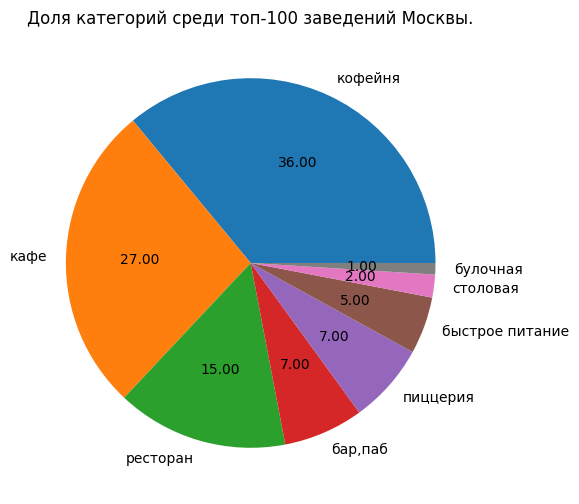

In [77]:
top100_cat.plot(kind='pie',\
                autopct='%.2f', subplots=True, figsize=(6, 6), legend=False)
plt.title('Доля категорий среди топ-100 заведений Москвы.')
plt.ylabel('')
plt.show()

**Вывод:** В списке топ-100 лучших заведений Москвы большую долю занимают кофейни - 36%, кафе - 27% и рестораны - 15%. Столовых всего две(2%) и булочная одна единственная.

Лучшие 100 заведений Москвы, по районам:

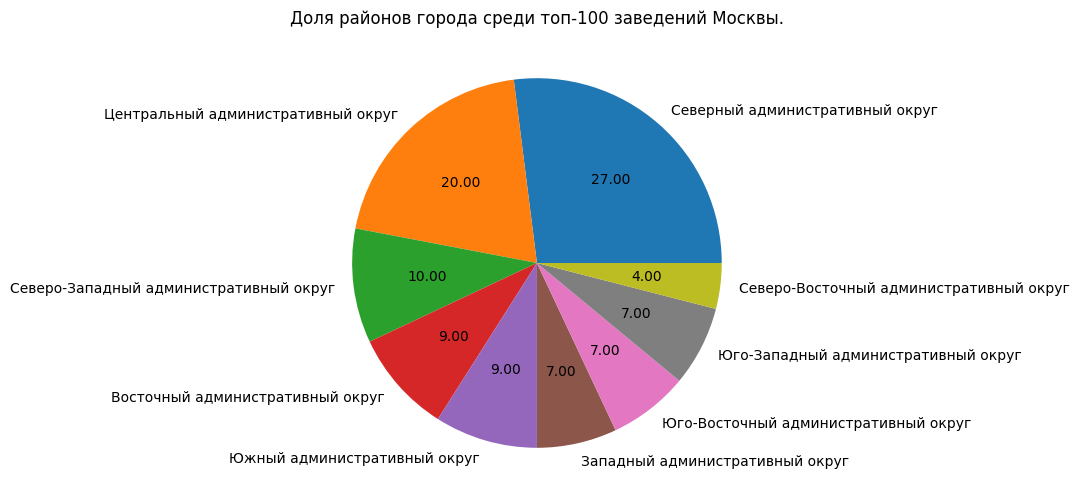

In [78]:
top100_district = kafe.query('rating == 5.0').head(100).pivot_table(index=['district'],\
       values='rating', aggfunc='count').sort_values(by='rating', ascending=False)
top100_district.plot(kind='pie',\
                autopct='%.2f', subplots=True, figsize=(6, 6), legend=False)
plt.title('Доля районов города среди топ-100 заведений Москвы.')
plt.ylabel('')
plt.show()

**Вывод:** Почти половину(47%) списка топ-100 лучших заведений Москвы составляют заведения Северного административного округа - 27% и Центрального административного округа - 20%. Выделяется Северо-Восточный административный округ с минимальной долей - 4%. Остальные округа имеют доли от 7 до 10 процентов.

#### Изучу распределение оценок пользователей среди круглосуточных заведений по категориям:

In [79]:
all_time_rating = kafe.query('is_24_7 == True')\
.pivot_table(index='category', values='rating', aggfunc='describe')
all_time_rating

25%   50%   75%  count  max      mean  min       std
category                                                               
бар,паб          4.200  4.40  4.40  52.0   4.9  4.184615  1.1  0.688956
булочная         3.975  4.20  4.30  24.0   4.7  4.058333  3.1  0.383255
быстрое питание  3.800  4.10  4.30  150.0  4.7  3.933333  2.0  0.530122
кафе             3.900  4.10  4.30  267.0  5.0  4.028090  1.1  0.536976
кофейня          4.100  4.20  4.35  59.0   5.0  4.206780  2.3  0.386792
пиццерия         4.050  4.20  4.30  31.0   4.5  4.054839  2.6  0.473877
ресторан         4.100  4.30  4.40  135.0  4.9  4.202963  1.7  0.414466
столовая         4.000  4.25  4.40  12.0   4.9  4.250000  4.0  0.264575

In [80]:
for i in range(len(kafe['is_24_7'])):
    
    if kafe['is_24_7'][i] == True:
        kafe.loc[i, 'all_time'] = 'круглосуточное'
    else:
        kafe.loc[i, 'all_time'] = 'не круглосуточное'
        

In [81]:
all_time_rating = kafe.query('is_24_7 == True')
fig = px.box(all_time_rating,
            y='rating',
            x='category',
            title='Распределение рейтинга круглосуточных заведений по категориям.',
            template = 'ggplot2'
             )
fig.update_layout(xaxis_title='Категория.',
                  yaxis_title='Распределение рейтингов.')

**Вывод:** Оценивая распределение оценок пользователей среди круглосуточных заведений по категориям, можно отметить что пользователей меньше всего устраивает качество услуг круглосуточных заведений быстрого питания и кафе. Одновременно пользователи высоко оценивают качество услуг круглосуточных баров, пабов, ресторанов и столовых: они имеют наивысшие оценки пользователей.

#### Вывод по анализу данных:

* В данных для исследования представлены 8 категорий заведений общественного питания: кафе, ресторан, кофейня, пиццерия, бар,паб, быстрое питание, булочная, столовая;

* Среди категорий заведений наибольшее количество заведений у категорий:

    * кафе - 2376 заведений;
    * ресторан - 2041 заведений;
    * кофейня - 1413 заведений.
    
* Cреди категорий больше всего кафе - 28.3%, ресторанов - 24.3% и кофейн - 16.8%. Меньше всего столовых- 3.7% и булочных - 3.0%;

* Больше всего посадочных мест в ресторанах - 29.8%, в кафе - 22.5% и в кофейнях - 16.1%. Меньше всего в столовых- 3.2% и в булочных - 2.8%.

* На рынке общественного питания Москвы имеется 3204 заведения с сетевым статусом. Они занимают 38% рынка. Несетевых заведений почти в два раза больше 5198. Они составляют 62% от всех заведений. Лидером по соотношению "сетевое/несетевое" является категория булочная. За ней на втором месте пиццерия и на третьем кофейня. Минимальное соотношение "сетевое/несетевое" у столовых и у баров, пабов.

* Самые популярные сети заведений общественного питания в городе Москве: шоколадница, домино'с пицца, додо пицца, one price coffee, яндекс лавка, cofix, prime, кофепорт, кулинарная лавка братьев караваевых, теремок, cofefest, чайхана, буханка, drive café, кофемания. Да, эти сети мне знакомы: их вывески встречаются в самых разных местах города: в парках, у вокзалов, в аэропортах. Сети имеют один главный объединяющий признак: название. Но, они ещё характеризуются единым оформлением, общей ценовой и ассортиментной политикой, централизованным управлением. Сети - способ мультипликации бизнеса, позволяющий увеличить доходы путём расширения географии охвата покупателей, оптимизации логистики и унификации администрирования бизнеса.

* Больше всего заведений в Центральном административном округе. В остальных округах значение примерно одинаковое за исключением Северо-Западного административного округа, где заведений значительно меньше. Заведения общественного питания распределены по городу следующим образом:

    * Центральный административный округ 2242 заведений,
    * Северный административный округ 898 заведений,
    * Южный административный округ 892 заведений,
    * Северо-Восточный административный округ 890 заведений,
    * Западный административный округ 850 заведений,
    * Восточный административный округ 798 заведений,
    * Юго-Восточный административный округ 714 заведений,
    * Юго-Западный административный округ 709 заведений,
    * Северо-Западный административный округ 409 заведений;
    
* Среди районов города обнаруживается абсолютное превосходство Центрального административного округа, как по общему количеству заведений, так и по категориям заведений. Интересно выглядит сходство распределения по остальным округам, за исключением Северо-Западного административного округа, где заведений значительно меньше по всем категориям;

* Наиболее высокие рейтинги у баров и пабов. Рестораны, кофейни, пиццерии, столовые и булочные имеют почти равные рейтинги. Хуже всего с рейтингами у кафе и у заведений быстрого питания. Только 105 из 8402 заведений в нашем исследовании, удостоены оценки «5» , что составляет 1,25%;

* С помощью графического конструктора Choroplet на карту Москвы наложено категориальное представление о средних рейтингах заведений общественного питания по районам города. Значения сгруппированы в категории по оттенку цвета, при этом цветовая шкала показывает диапазон значений которому соответствует данный оттенок или цвет: так можно увидеть что в самом центре города самые высокие рейтинги, это Центральный административный округ окрашен красным,  со средним рейтингом равным 4,38 балла. За ним Северный административный округ со значением 4,24 балла окрашен зелёным. На третьем месте со значением 4,20 находится Северо-Западный административный округ и окрашен салатовым цветом. Сразу пять округов покрашены в один цвет, синий, потому что значения их средних рейтингов практически равны, 4,17 и 4,18. Голубой цвет красит Юго-Восточный округ, с минимальным средним рейтингом - 4,10 балла;

* Топ-15 улиц по количеству заведений: проспект мира, профсоюзная улица, проспект вернадского, ленинский проспект, ленинградский проспект, дмитровское шоссе, каширское шоссе, варшавское шоссе, ленинградское шоссе, люблинская улица, улица вавилова, кутузовский проспект, улица миклухо-маклая, пятницкая улица, алтуфьевское шоссе;

* На 434 улицах города Москвы имеется только один объект общественного питания. Наиболее часто среди "единственных" заведений встречаются кафе, рестораны и кофейни. Лидерами по количеству улиц с "единственным" заведением являются Центральный административный округ с 136 такими заведениями и Восточный административный округ с 54. Меньше всего таких улиц в Северо-Западном административном округе - всего 19, и в Юго-Западном административном округе - всего 18;

* Значение средних чеков выше всего в Западном административном округе и в Центральном административном округе - 1000 рублей.

    * В Северо-Западном административном округе - 700.0 рублей, в Северном административном округе - 650.0 рублей и в Юго-Западном административном округе - 600.0 рублей.
    * Северо-Восточный административный округ - 500.0 рублей, Южный административный округ - 500.0 рублей и Юго-Восточный административный округ - 450 рублей показывают найменьшие значения средних чеков;
    
* С помощью графического конструктора Choroplet на карту Москвы наложено категориальное представление о медианном значении среднего чека в заведениях общественного питания по районам города. Значения сгруппированы в категории по оттенку цвета, при этом цветовая шкала показывает диапазон значений которому соответствует данный оттенок или цвет:
    * Так можно увидеть что красным цветом соответствующий самым высоким значениям - 1000 рублей, окрашены Центральный административный округ и Западный административный округ.
    * Следующие за ними Северный административный округ и Северо-Западный административный округ окрашены светло-зелёным, значения 650 и 700 рублей.
    * Синим цветом окрашены Восточный административный округ и Юго-Западный административный округ, значения 575 и 600 рублей.
    * Сразу три округа покрашены в один цвет, голубой, потому что в их заведениях медианное значение средних чеков практически равны: 450, 500 и 500.

* В Центральном административном округе самое высокое медианное значение среднего чека по 5 категориям из 8: бар,паб, пиццерия, булочная, кафе и быстрое питание.

    * Важно отметить, что в категории бар,паб самые высокие медианные значения равны у трёх округов: у Западного, у Центрального и у Северного администативных округов.
    * По категориям ресторан и кофейная лидирует Западный административный округ. По барам, пабам самый высокий средний чек у Северного административного округа.
    * В столовых Юго-Западного административного округа самый высокий средний чек в городе.;

* В Москве 105 заведений общественного питания имеют наивысшую среднюю оценку пользователей. В списке топ-100 лучших заведений Москвы большую долю занимают кофейни - 36%, кафе - 27% и рестораны - 15%. Столовых всего две(2%) и булочная одна единственная;

* Оценивая распределение оценок пользователей среди круглосуточных заведений по категориям, можно отметить что пользователей круглосуточных заведений меньше всего устраивает качество услуг круглосуточных заведений быстрого питания и кафе. Одновременно пользователи высоко оценивают качество услуг круглосуточных баров, пабов, ресторанов и столовых: они имеют наивысшие оценки пользователей.

## Детализируем исследование: открытие кофейни.<a id="detal"></a>

### Сколько всего кофеен в датасете?

Для работы с кофейнями отфильтрую таблицу kafe по категории "кофейня" и результат сохраняю в новую переменную **coffeehouse**.

In [82]:
coffeehouse = kafe.query('category == "кофейня"')
print(f'В городе Москве действует {coffeehouse["name"].count()} кофейн.')

В городе Москве действует 1413 кофейн.


### В каких районах их больше всего, каковы особенности их расположения?


In [83]:
coffeehouse_district = coffeehouse.pivot_table(index=['district'], values='name', aggfunc='count')
coffeehouse_district.rename(columns={'name': 'total_coffeehouse'}, inplace=True)
coffeehouse_district.reset_index().sort_values(by='total_coffeehouse', ascending=False)

district  total_coffeehouse
5  Центральный административный округ       428              
2  Северный административный округ          193              
3  Северо-Восточный административный округ  159              
1  Западный административный округ          150              
8  Южный административный округ             131              
0  Восточный административный округ         105              
7  Юго-Западный административный округ      96               
6  Юго-Восточный административный округ     89               
4  Северо-Западный административный округ   62

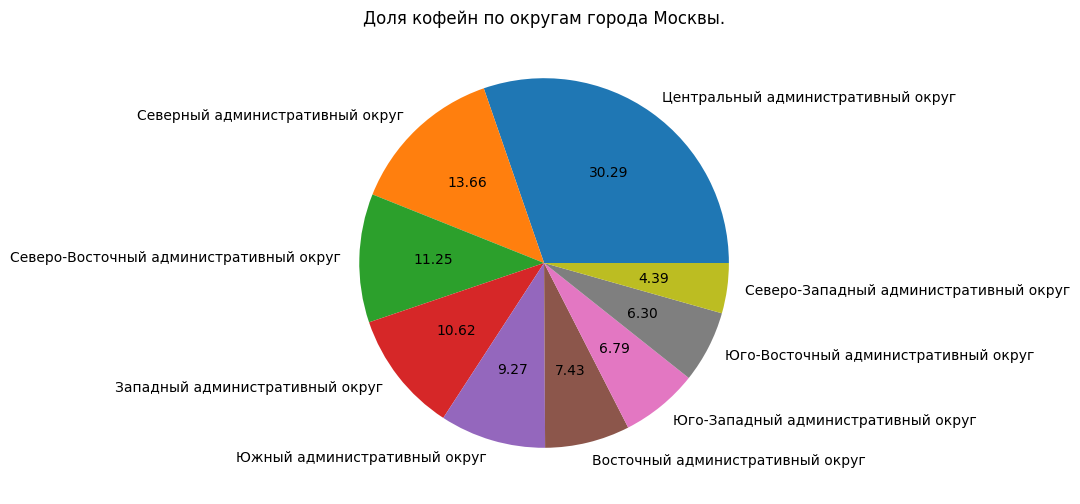

In [84]:
coffeehouse['district'].value_counts().plot(kind='pie', autopct='%.2f', subplots=True, figsize=(6, 6))
plt.title('Доля кофейн по округам города Москвы.')
plt.ylabel('')
plt.show()

**Вывод:** Более половины(55.2%) кофейн города Москвы находятся в трёх округах: в Центральном административном округе - 428 заведений(30.29%), в Северном административном округе - 193 заведений(13.66%) и 159 заведений в Северо-Восточном административном округе(11.25%). Меньше всего кофейн в Северо-Западном административном округе - 62 заведения(4.39%).

### На каких улицах есть десять и более кофейн?

In [85]:
coffeehouse_street = coffeehouse.pivot_table(index=['district', 'street'], values='name', aggfunc='count')
coffeehouse_street.rename(columns={'name': 'total_coffeehouse'}, inplace=True)
coffeehouse_street = coffeehouse_street.reset_index().sort_values(by='total_coffeehouse', ascending=False)
streets = coffeehouse_street.query('total_coffeehouse > 10')[['street', 'total_coffeehouse']]
streets.reset_index(drop= True , inplace= True)
streets

street  total_coffeehouse
0   ленинградский проспект  25               
1   проспект мира           19               
2   ленинский проспект      18               
3   профсоюзная улица       18               
4   проспект мира           17               
5   проспект вернадского    16               
6   каширское шоссе         16               
7   варшавское шоссе        14               
8   кутузовский проспект    13               
9   ленинградское шоссе     13               
10  новослободская улица    13               
11  новодмитровская улица   12               
12  люблинская улица        11

**Вывод:** На улицах 'ленинградский проспект', 'проспект мира', 'ленинский проспект', 'профсоюзная улица', 'проспект мира', 'проспект вернадского', 'каширское шоссе', 'варшавское шоссе', 'кутузовский проспект', 'ленинградское шоссе', 'новослободская улица', 'новодмитровская улица' и 'люблинская улица', находятся по 10 и более кофейн.

### Есть ли круглосуточные кофейни?

In [86]:
coffeehouse['all_time'].value_counts()

all_time
не круглосуточное    1354
круглосуточное       59  
Name: count, dtype: int64

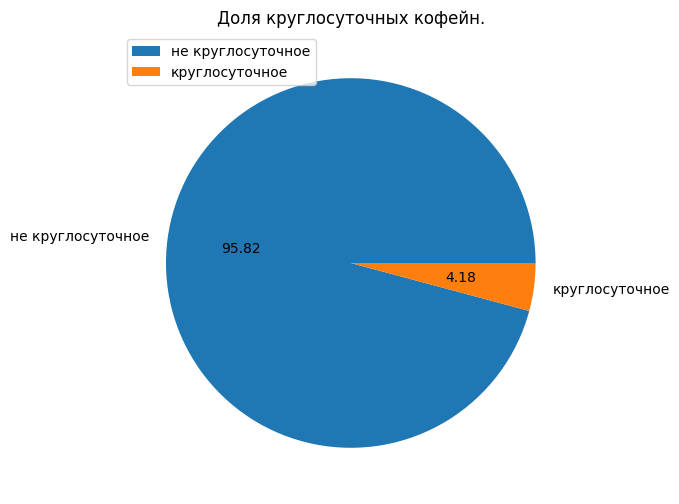

In [87]:
coffeehouse['all_time'].value_counts()\
.plot(kind='pie', autopct='%.2f', subplots=True, figsize=(8, 6), legend=True)
plt.title('Доля круглосуточных кофейн.')
plt.ylabel('')
plt.show()

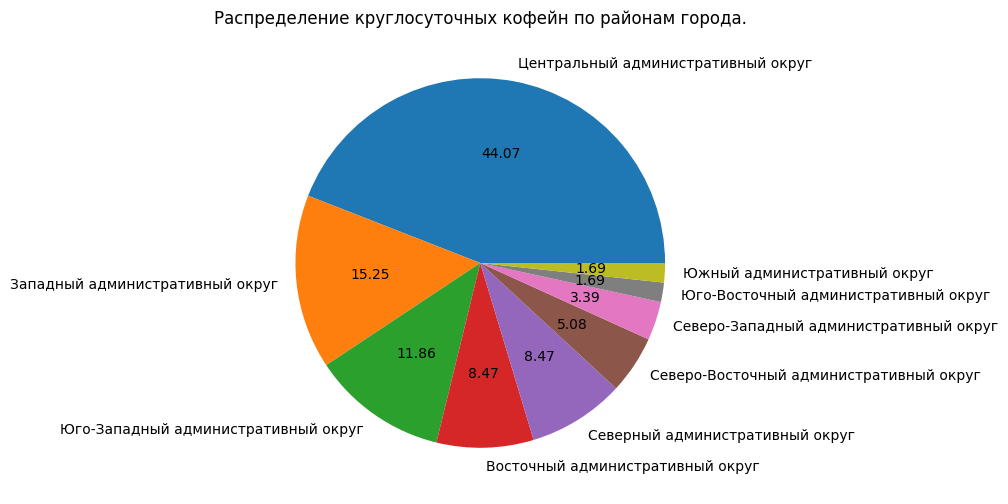

In [88]:
coffeehouse.query('all_time == "круглосуточное"')\
.pivot_table(index='district', values='name', aggfunc='count')\
.sort_values(by='name', ascending=False).plot(kind='pie', autopct='%.2f',\
            subplots=True, figsize=(6, 6), legend=False)
plt.title('Распределение круглосуточных кофейн по районам города.')
plt.ylabel('')

plt.show()

**Вывод:** В Москве работает 59 круглосуточных кофейн. Они составляют 4.18% от общего количества кофейн в городе.Более двух третьих(71,18%) круглосуточных кофейн находятся в трёх округах:
* Центральный административный округ - 44.07%,
* Западный административный округ - 15.25%,
* Юго-Западный административный округ - 11.86%.

Меньше всего круглосуточных кофейн в Южном административном округе - 1.69%, и в Юго-Восточном административном округе - 1.69%.

### Какие у кофеен рейтинги?

In [89]:
kafe.pivot_table(index='category', values='rating', aggfunc=['mean', 'median'])


mean median
                   rating rating
category                        
бар,паб          4.387712  4.4  
булочная         4.268359  4.3  
быстрое питание  4.050249  4.2  
кафе             4.124285  4.2  
кофейня          4.277282  4.3  
пиццерия         4.301264  4.3  
ресторан         4.290348  4.3  
столовая         4.211429  4.3

**Вывод:** В сравнении с другими категориями средний рейтинг кофейн - 4.28, ниже только чем у баров, пабов, ресторанов и пиццерий. Если сравнить медианные значения - 4.30, то ниже только чем у баров, пабов.

 ### Как рейтинги кофейн распределяются по районам?

In [90]:
coffeehouse.pivot_table(index='district', values='rating', aggfunc='describe')

25%  50%    75%  count  max  \
district                                                                 
Восточный административный округ         4.100  4.3  4.400  105.0  5.0   
Западный административный округ          4.025  4.2  4.375  150.0  5.0   
Северный административный округ          4.100  4.3  4.500  193.0  5.0   
Северо-Восточный административный округ  4.100  4.3  4.400  159.0  5.0   
Северо-Западный административный округ   4.200  4.3  4.500  62.0   5.0   
Центральный административный округ       4.200  4.3  4.400  428.0  5.0   
Юго-Восточный административный округ     4.100  4.3  4.500  89.0   5.0   
Юго-Западный административный округ      4.100  4.3  4.500  96.0   5.0   
Южный административный округ             4.100  4.3  4.400  131.0  5.0   

                                             mean  min       std  
district                                                          
Восточный административный округ         4.282857  3.0  0.376077  
Западный административный округ          4.195333  2.3  0.361454  
Северный административный округ          4.291710  2.0  0.444097  
Северо-Восточный административный округ  4.216981  1.4  0.425487  
Северо-Западный административный округ   4.325806  2.0  0.430377  
Центральный административный округ       4.336449  2.3  0.256948  
Юго-Восточный административный округ     4.225843  2.3  0.514456  
Юго-Западный административный округ      4.283333  3.3  0.304930  
Южный административный округ             4.232824  2.0  0.388576

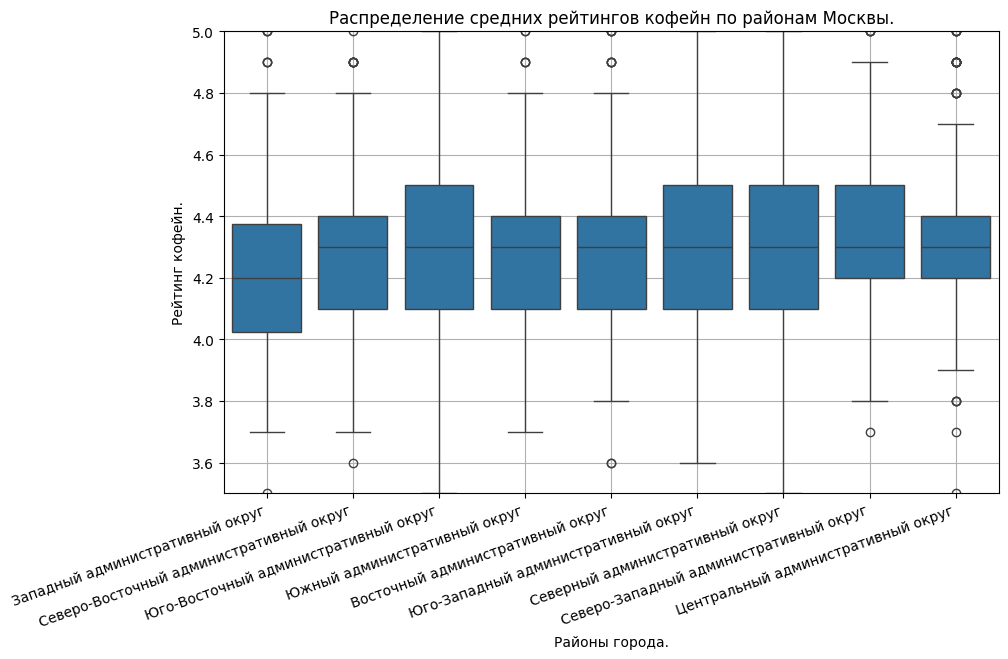

In [91]:
order = coffeehouse.groupby('district').agg({'rating': 'mean'}).sort_values('rating').index.tolist()
plt.figure(figsize=(10, 6))
sns.boxplot(x='district', y='rating', data=coffeehouse, order=order)
plt.title('Распределение средних рейтингов кофейн по районам Москвы.')
plt.xticks(rotation=20, horizontalalignment='right')
plt.ylim(3.5, 5)
plt.xlabel('Районы города.')
plt.ylabel('Рейтинг кофейн.')
plt.grid()

plt.show()

**Вывод:** Рейтинги кофейн по районам города распределены достаточно равномерно: Значение медианны в 8 из 9 округах одинаковое - 4.3, а в девятом, в Западном административном округе - 4.2. По средним значениям лучший рейтинг у Центрального административного округа - 4.34.

### На какую цену чашки капучино стоит ориентироваться при открытии и почему?

In [92]:
coffeehouse['middle_coffee_cup'] .describe()

count    521.000000 
mean     175.055662 
std      89.753009  
min      60.000000  
25%      124.000000 
50%      170.000000 
75%      225.000000 
max      1568.000000
Name: middle_coffee_cup, dtype: float64

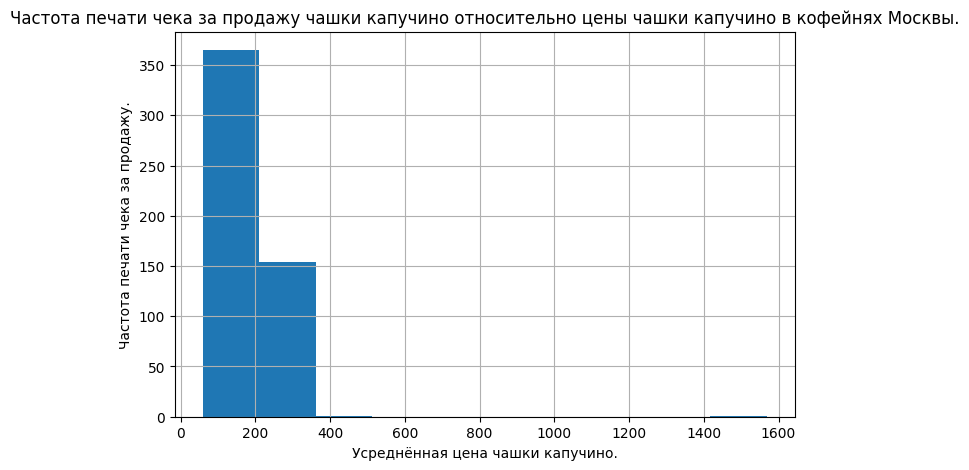

In [93]:
coffeehouse['middle_coffee_cup'].plot(kind='hist', grid=True, figsize=(8, 5))
plt.title('Частота печати чека за продажу чашки капучино относительно \
цены чашки капучино в кофейнях Москвы.')
plt.xlabel('Усреднённая цена чашки капучино.')
plt.ylabel('Частота печати чека за продажу.')
plt.show()

Для более достоверного определения оптимальной цены чашки капучино при открытии кофейни, я буду изучать распределение цены чашки капучино не во всех кофейнях, а в лучших, там где рейтинг выше 4.6 баллов. Таких заведений 241. С этой целью создаю новую переменную **top_coffeehouse**.

In [94]:
top_coffeehouse = coffeehouse.query('rating >= 4.6')
len(top_coffeehouse)

241

In [95]:
top_coffeehouse['middle_coffee_cup'] .describe()

count    89.000000 
mean     175.988764
std      51.067579 
min      60.000000 
25%      139.000000
50%      170.000000
75%      205.000000
max      300.000000
Name: middle_coffee_cup, dtype: float64

In [96]:
len(top_coffeehouse.query('middle_coffee_cup < 139'))

19

In [97]:
len(top_coffeehouse.query('middle_coffee_cup > 205'))

22

In [98]:
top_coffeehouse['middle_coffee_cup'].median()

170.0

In [99]:
top_coffeehouse['middle_coffee_cup'].mean().round()

176.0

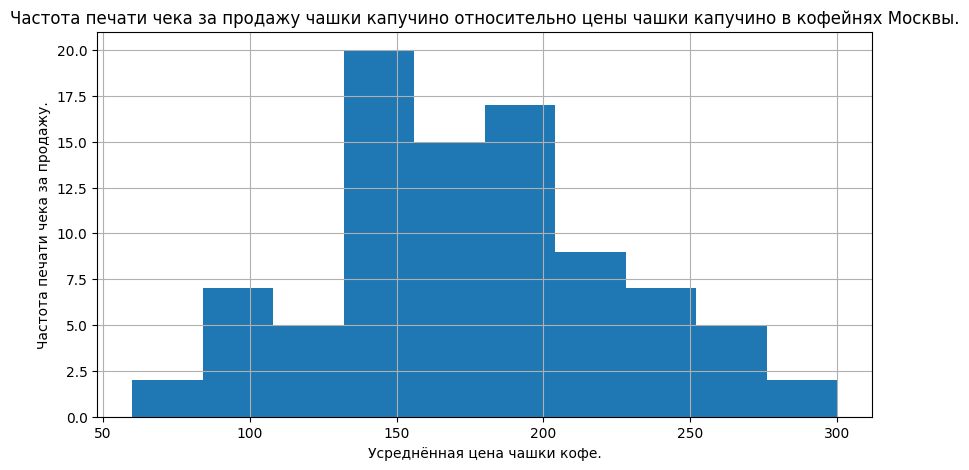

In [100]:
top_coffeehouse['middle_coffee_cup'].plot(kind='hist', figsize=(10, 5), grid=True)
plt.title('Частота печати чека за продажу чашки капучино относительно \
цены чашки капучино в кофейнях Москвы.')
plt.xlabel('Усреднённая цена чашки кофе.')
plt.ylabel('Частота печати чека за продажу.')
plt.show()

**Вывод:** Большинство заведений продают чашку капучино по цене между Q1 = 139 рублей и Q3 = 205 рублей. Медианное значение цены равно 170 рублей. Средняя цена равна 176 рублей. Всего 19 заведений продают капучино по цене меньше Q1 = 139 рублей. И только 22 заведения продают по цене больше Q3 = 205 рублей.

**Изучу распределение средней цены на чашку капучино по районам города.**

In [101]:
top_coffeehouse.query('middle_coffee_cup.notnull()')\
.pivot_table(index='district', values='middle_coffee_cup', aggfunc='describe')

25%    50%     75%  count    max  \
district                                                                       
Восточный административный округ         111.25  130.0  134.75  10.0   200.0   
Западный административный округ          206.25  227.5  248.75  2.0    270.0   
Северный административный округ          140.00  157.5  196.25  16.0   245.0   
Северо-Восточный административный округ  139.00  152.0  175.50  6.0    185.0   
Северо-Западный административный округ   152.00  174.0  189.50  7.0    250.0   
Центральный административный округ       181.00  200.0  245.00  26.0   300.0   
Юго-Восточный административный округ     100.00  150.0  152.50  8.0    160.0   
Юго-Западный административный округ      155.00  190.0  221.25  4.0    240.0   
Южный административный округ             127.50  185.0  208.75  10.0   275.0   

                                               mean    min        std  
district                                                               
Восточный административный округ         133.400000  90.0   34.075733  
Западный административный округ          227.500000  185.0  60.104076  
Северный административный округ          168.375000  90.0   39.617967  
Северо-Восточный административный округ  156.833333  134.0  22.400149  
Северо-Западный административный округ   177.428571  135.0  39.203984  
Центральный административный округ       210.461538  149.0  45.202859  
Юго-Восточный административный округ     130.625000  75.0   33.427694  
Юго-Западный административный округ      186.250000  125.0  51.376875  
Южный административный округ             173.500000  60.0   65.745722

**Вывод:** При медианной цене по городу 170 рублей, медианная цена на чашку капучино по районам города распределяется от 130 рублей в Восточном административном округе до 227 рублей в Западном административном округе.

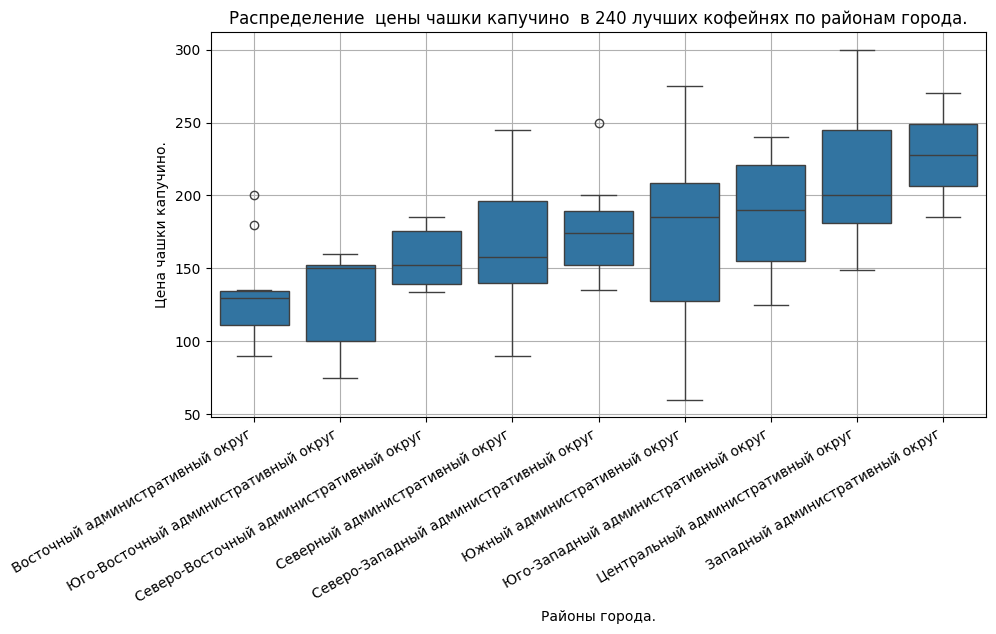

In [102]:
order = top_coffeehouse.groupby("district").agg({'middle_coffee_cup': 'median'}).sort_values('middle_coffee_cup').index.tolist()
plt.figure(figsize=(10, 5))
sns.boxplot(x="district", y='middle_coffee_cup', data=top_coffeehouse, order=order)
plt.title('Распределение  цены чашки капучино  в 240 лучших кофейнях по районам города.')
plt.xticks(rotation=30, horizontalalignment="right")
plt.xlabel('Районы города.')
plt.ylabel('Цена чашки капучино.')
plt.grid()
plt.show()

**Вывод:** Рекомендованная цена чашки капучино: 150 рублей. Почему?

* Первый месяц работы кофейни желательно иметь наиболее привлекательную цену, даже ниже медианной цены по рынку. Рентабельность не пострадает от  этого. Первый месяц необходимо заложить основу клиентской базы и для этого у посетителей новой кофейни должно сформироваться как можно более приятное впечатление. Они взамен поделятся с друзьями и в ресурсах оставят хорошие оценки. После месяца работы можно изучить количество посещений, объёмы продаж, средние чеки и другие показатели которые помогут определить ценовую политику чтобы обеспечить рентабельность.

### На какое количество посадочных мест стоит ориентироваться при открытии кофейни и почему?

In [103]:
top_coffeehouse['seats'].describe()

count    125.000000
mean     94.232000 
std      97.406211 
min      0.000000  
25%      20.000000 
50%      70.000000 
75%      144.000000
max      625.000000
Name: seats, dtype: float64

#### Сгруппирую медианное значение количества посадочных мест по районам города.

In [104]:
district_seats = top_coffeehouse.query('seats.notnull()')\
            .pivot_table(index='district', values='seats', aggfunc='median')
district_seats.sort_values(by='seats')

seats
district                                      
Северо-Западный административный округ   14.0 
Юго-Восточный административный округ     40.0 
Северо-Восточный административный округ  44.0 
Восточный административный округ         52.0 
Западный административный округ          60.0 
Центральный административный округ       80.0 
Северный административный округ          95.0 
Юго-Западный административный округ      100.0
Южный административный округ             190.0

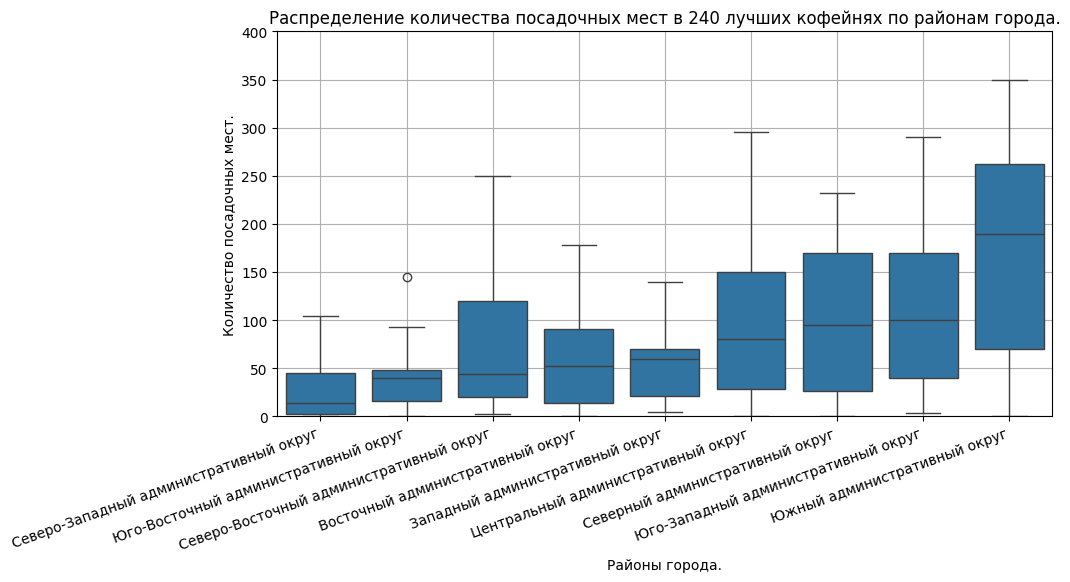

In [105]:
order = top_coffeehouse.groupby("district").agg({'seats': 'median'}).sort_values("seats").index.tolist()
plt.figure(figsize=(10, 5))
sns.boxplot(x="district", y="seats", data=top_coffeehouse, order=order)
plt.title('Распределение количества посадочных мест в 240 лучших кофейнях по районам города.')
plt.xticks(rotation=20, horizontalalignment="right")
plt.ylim(0, 400)
plt.xlabel('Районы города.')
plt.ylabel('Количество посадочных мест.')
plt.grid()
plt.show()

**Вывод:** При медианном количестве посадочных мест по городу равном 70, медианное количество посадочных мест среди 240 лучших кофейн Москвы по районам города распределяется от 14 мест в Северо-Западном административном округе до 190 мест в Южном административном округе. 

#### Изучаю корреляцию между ценой чашки кофе и количеством посадочных мест:

In [106]:
top_coffeehouse['seats'].corr(top_coffeehouse['middle_coffee_cup'])

0.05450972133595423

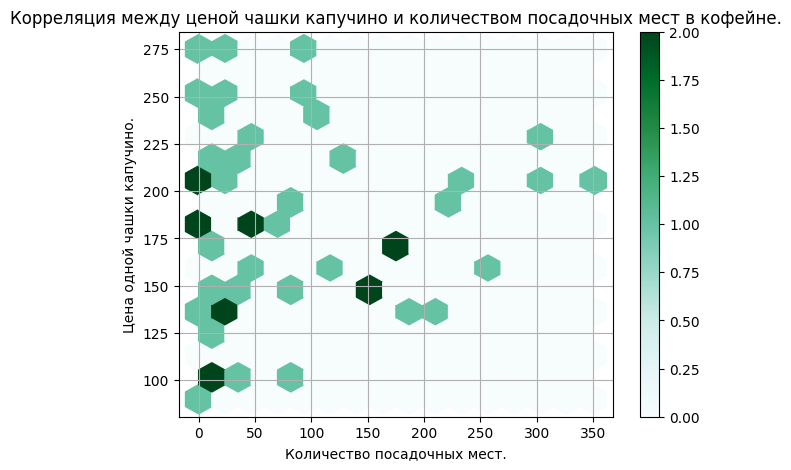

In [107]:
top_coffeehouse.plot(x='seats', y='middle_coffee_cup', kind='hexbin', gridsize=15, figsize=(7, 5), sharex=False, grid=True)
plt.title('Корреляция между ценой чашки капучино и количеством посадочных мест в кофейне.')
plt.xlabel('Количество посадочных мест.')
plt.ylabel('Цена одной чашки капучино.')
plt.show()

**Вывод:** Между ценой чашки капучино в кофейни и количеством посадочных мест, в наших данных не обнаруживается корреляция. Действительно сегодня есть заведения которые торгуют online и доставляют кофе курьерами, при этом у них ноль посадочных мест. Есть и offline киоски продающие кофе с собой, без зала и посадочных мест. 

Однако, при выборе помещения под кофейню, важно понимать что для размещения большего количества посадочных мест требуется большая площадь помещения. А площадь помещения прямо пропорциональна расходам по аренде и обслуживанию помещения, а также и расходам по оплате труда и социальных отчислений нанятых работников. Так, чтобы бизнес процветал надо найти золотую середину, оптимальную корреляцию, которой в нашей таблице не оказалось, но в бизнесе объязательно найти. Рекомендую ориентироваться на медианное значение количества посадочных мест того округа где будем открывать кофейню. В целом по Москве медиана по городу равна 70 посадочных мест.

**Изучаю гистограмму распределения количества посадочных мест лучших 240 заведений Москвы.**

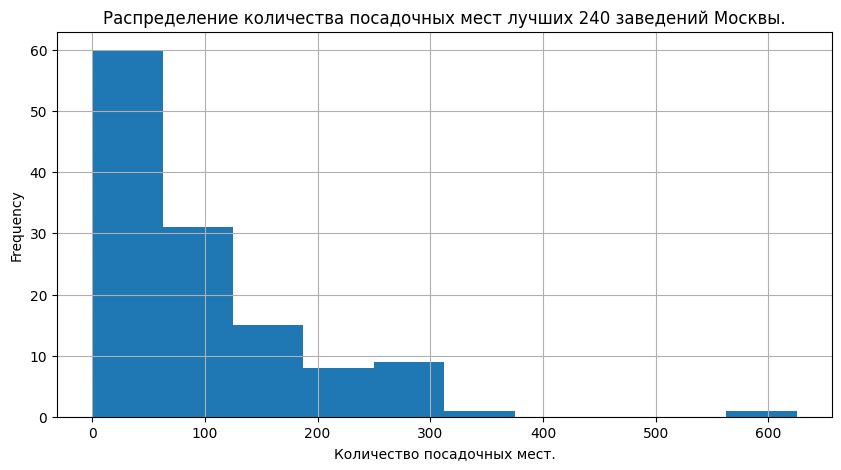

In [108]:
top_coffeehouse['seats'].plot(kind='hist', figsize=(10, 5), grid=True)
plt.title('Распределение количества посадочных мест лучших 240 заведений Москвы.')
plt.xlabel('Количество посадочных мест.')

plt.show()

**Вывод:** Из гистограммы видно что большинство лучших кофейн имеет не более 150 посадочных мест.

### Вывод по детализированному исследованию кофейн:

Вывод по детализированному исследованию кофейн:

* В городе Москве действует 1413 кофейн.


* Более половины(55.2%) кофейн города Москвы находятся в трёх округах: в Центральном административном округе - 428 заведений(30.29%), в Северном административном округе - 193 заведений(13.66%) и 159 заведений в Северо-Восточном административном округе(11.25%). Меньше всего кофейн в Северо-Западном административном округе - 62 заведения(4.39%).


* На улицах 'ленинградский проспект', 'проспект мира', 'ленинский проспект', 'профсоюзная улица', 'проспект мира', 'проспект вернадского', 'каширское шоссе', 'варшавское шоссе', 'кутузовский проспект', 'ленинградское шоссе', 'новослободская улица', 'новодмитровская улица' и 'люблинская улица', находятся по 10 и более кофейн.


* В Москве работает 59 круглосуточных кофейн. Они составляют 4.18% от общего количества кофейн в городе. Меньше всего круглосуточных кофейн в Южном административном округе - 1.69%, и в Юго-Восточном административном округе - 1.69%. Более двух третьих(71,18%) круглосуточных кофейн находятся в трёх округах:


     * Центральный административный округ - 44.07%,
     * Западный административный округ - 15.25%,
     * Юго-Западный административный округ - 11.86%.
    
    
   
* Рейтинги кофейн по районам города распределены достаточно равномерно: Значение первого квартиля находится между 4.025 и 4.1, значение медианны в 8 из 9 округах одинаковое - 4.3, а в девятом 4.2. Третий квартиль находится между 4.375 и 4.5.
    

* В сравнении с другими категориями средний рейтинг кофейн - 4.28, ниже только чем у баров, пабов, у ресторанов и у пиццерий. Если сравнить медианные значения - 4.30, то ниже только чем у баров, пабов.


* Рейтинги кофейн по районам города распределены достаточно равномерно: Значение медианны в 8 из 9 округах одинаковое - 4.3, а в девятом, в Западном административном округе - 4.2. По средним значениям лучший рейтинг у Центрального административного округа - 4.33.


* Рекомендованная цена чашки капучино: **150** рублей. Почему?


Первый месяц работы кофейни желательно иметь наиболее привлекательную цену, promo цену, ниже даже медианной цены по городу, которая равна 170 рублей. Первый месяц работы необходимо запустить трафик посетителей, раздавать покупателям приятное впечатление чтобы заложить основу клиентской базы, основу успеха бизнеса. Взамен посетители поделятся с друзьями и на разных ресурсах оставят хорошие оценки и отзывы, совершат повторные посещения. После месяца работы необходимо изучить количество посещений, объёмы продаж, средние чеки и другие показатели которые помогут определить ценовую политику чтобы обеспечить рентабельность работы.

* Между ценой чашки капучино в кофейни и количеством посадочных мест, в наших данных не обнаруживается корреляция. 
Действительно сегодня есть заведения которые торгуют online и доставляют кофе курьерами, при этом у них ноль посадочных мест. Есть и offline киоски продающие кофе с собой, без зала и посадочных мест. 
Однако, при выборе помещения под кофейню, надо понимать что для размещения большего количества посадочных мест требуется большая площадь помещения. А площадь помещения прямо пропорциональна расходам по аренде и обслуживанию помещения, а также и расходам по оплате труда и социальных отчислений нанятых работников. Так, чтобы бизнес процветал надо найти золотую середину, оптимальную корреляцию, которой в нашей таблице не оказалось, но в бизнесе обязательно найти. 
* Я рекомендую искать помещение способное разместить от **60 посадочных мест.**
Ещё рекомендую ориентироваться на медианное значение количества посадочных мест того округа где будем открывать кофейню. В целом по Москве медиана равна 70 посадочных мест. 